# For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [363]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

## Read the data from the '.csv' file as a monthly Time Series.

In [364]:
import os
os.chdir('D:\GL\Time Series Analysis\Project\Data Set')
df_spark = pd.read_csv('Sparkling.csv')
df_spark.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [365]:
df_spark.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [366]:
df_rose = pd.read_csv('Rose.csv')
df_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [367]:
df_rose.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [368]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

## Creating the combined Dataframe 

In [369]:
df = pd.DataFrame({'YearMonth':date,
                   'Sparkling':df_spark.Sparkling,
                   'Rose':df_rose.Rose})
df.set_index('YearMonth',inplace=True)

In [371]:
df.tail()

Sparkling  Rose
YearMonth                  
1995-03-31       1897  45.0
1995-04-30       1862  52.0
1995-05-31       1670  28.0
1995-06-30       1688  40.0
1995-07-31       2031  62.0

## Check the basic measures of descriptive statistics

In [372]:
df.describe()

Sparkling        Rose
count   187.000000  185.000000
mean   2402.417112   90.394595
std    1295.111540   39.175344
min    1070.000000   28.000000
25%    1605.000000   63.000000
50%    1874.000000   86.000000
75%    2549.000000  112.000000
max    7242.000000  267.000000

## Handle missing values

In [373]:
df.isnull().sum()

Sparkling    0
Rose         2
dtype: int64

Text(0, 0.5, 'Units Sold')

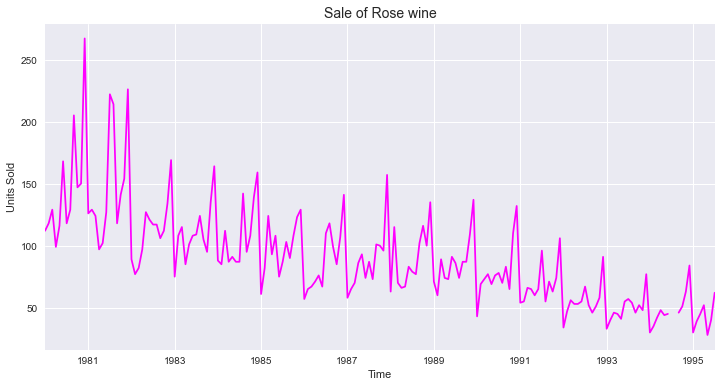

In [374]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='magenta')
plt.title('Sale of Rose wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

In [375]:
df['1994']

Sparkling  Rose
YearMonth                  
1994-01-31       1197  30.0
1994-02-28       1968  35.0
1994-03-31       1720  42.0
1994-04-30       1725  48.0
1994-05-31       1674  44.0
1994-06-30       1693  45.0
1994-07-31       2031   NaN
1994-08-31       1495   NaN
1994-09-30       2968  46.0
1994-10-31       3385  51.0
1994-11-30       3729  63.0
1994-12-31       5999  84.0

Since the data has monthly frequency, we can resample at a shorter frequency such as day, Daily to get a better predicton.
Some of the alias for time series frequency to be used in resample():
1. B: Business Day frequency
2. D: Calendar Day frequency
3. M: Month End frequency
4. MS: Month Start frequency
5. Q: Quarter End Frequency
6. QS: Quarter Start Frequency
7. H: Hourly Frequency
8. A: Year End frequency

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [376]:
df.converted  = df.Rose
ts = df.converted.resample('D').mean() 
df.Rose = ts.interpolate(method = 'linear')
df.Rose['1994']

YearMonth
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [377]:
df.describe()

Sparkling        Rose
count   187.000000  187.000000
mean   2402.417112   89.914497
std    1295.111540   39.238259
min    1070.000000   28.000000
25%    1605.000000   62.500000
50%    1874.000000   85.000000
75%    2549.000000  111.000000
max    7242.000000  267.000000

## Plot the Time Series to understand the behaviour of the data.

In [378]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] =  14,7

Text(0, 0.5, 'Units Sold')

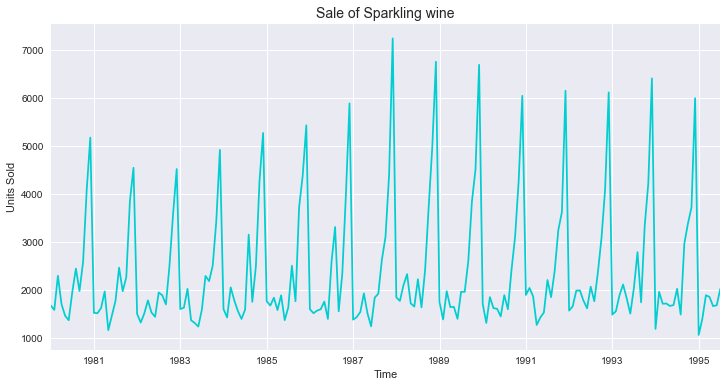

In [379]:
plt.figure(figsize = (12, 6))
df.Sparkling.plot(color='darkturquoise')
plt.title('Sale of Sparkling wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

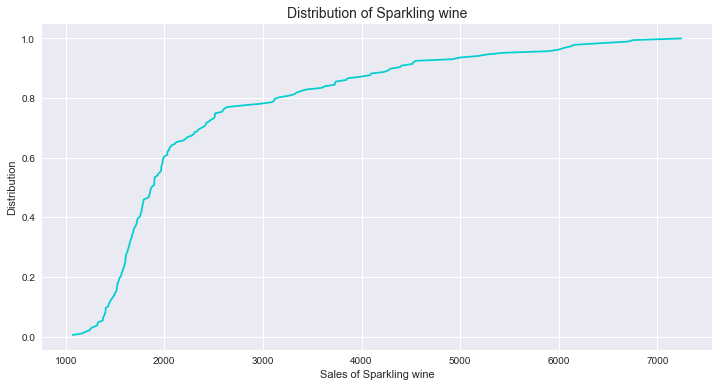

In [380]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 6))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'darkturquoise')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sales of Sparkling wine')
plt.ylabel('Distribution')

Text(0, 0.5, 'Units Sold')

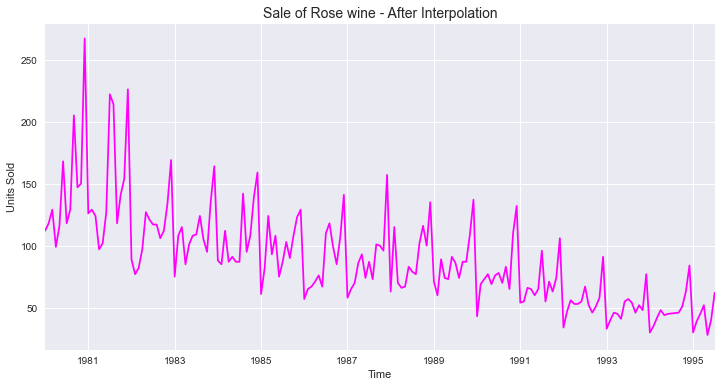

In [381]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='magenta')
plt.title('Sale of Rose wine - After Interpolation', fontsize =14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

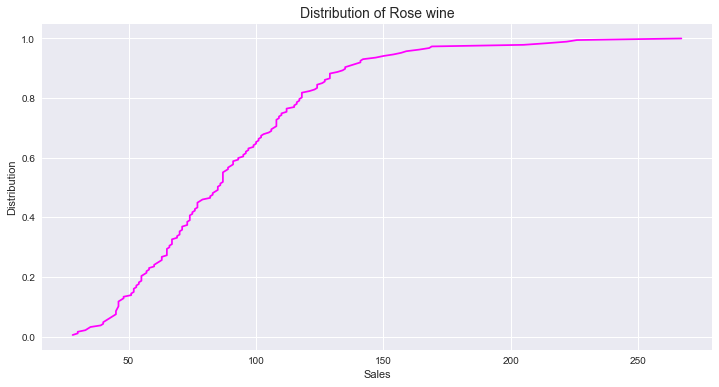

In [382]:
plt.figure(figsize = (12, 6))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'magenta')
plt.title('Distribution of Rose wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

## Plot a boxplot to understand the spread of wine sales across different years and within different months across years.

### Yearly Boxplot - Sparkling

Text(0.5, 1.0, 'Yearly Boxplot - Sparkling')

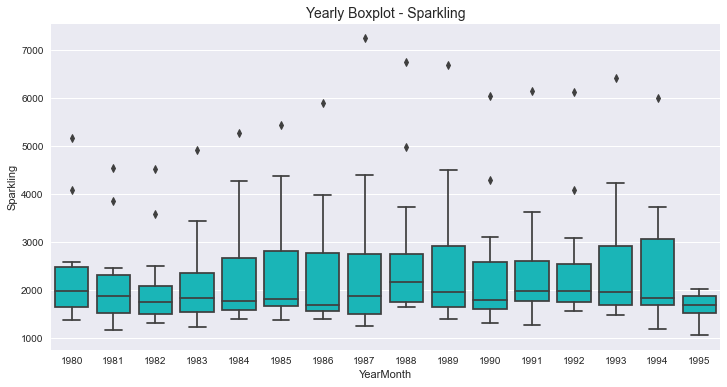

In [383]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.year,y = df['Sparkling'], color = 'darkturquoise')
plt.title('Yearly Boxplot - Sparkling', fontsize=14)

### Monthly Plot - Sparkling

Text(0.5, 1.0, 'Monthly Boxplot - Sparkling')

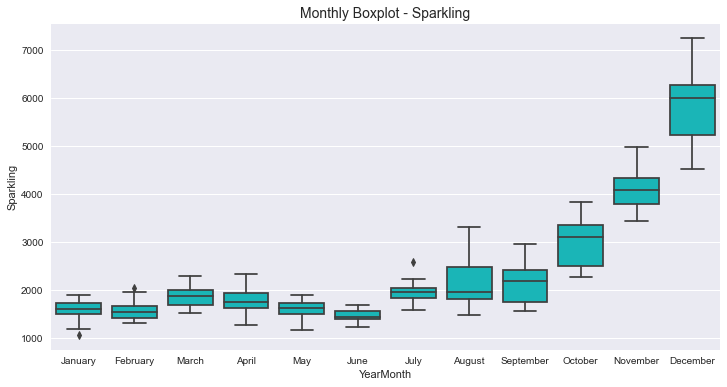

In [384]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'], color = 'darkturquoise')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)

### Yearly Boxplot - Rose

Text(0.5, 1.0, 'Yearly Boxplot - Rose')

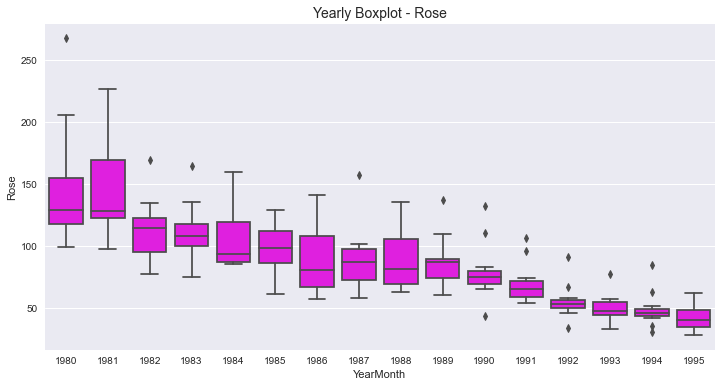

In [385]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.year,y = df['Rose'], color='magenta')
plt.title('Yearly Boxplot - Rose', fontsize=14)

### Monthly Plot - Rose

Text(0.5, 1.0, 'Monthly Boxplot - Rose')

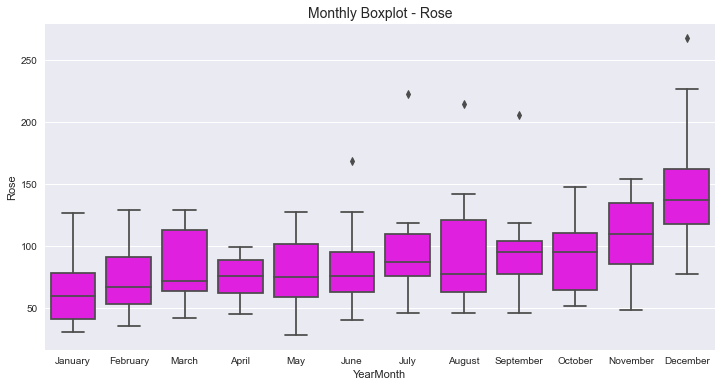

In [386]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Rose'], color='magenta')
plt.title('Monthly Boxplot - Rose', fontsize=14)

## Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

Text(0.5, 1.0, 'Sparkling - Monthly plot')

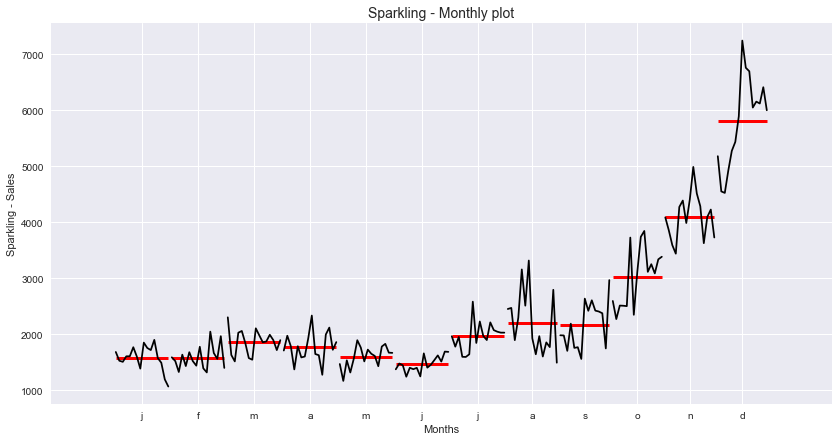

In [387]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Sparkling'],ylabel='Sparkling - Sales')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)

Text(0.5, 1.0, 'Rose - Monthly plot')

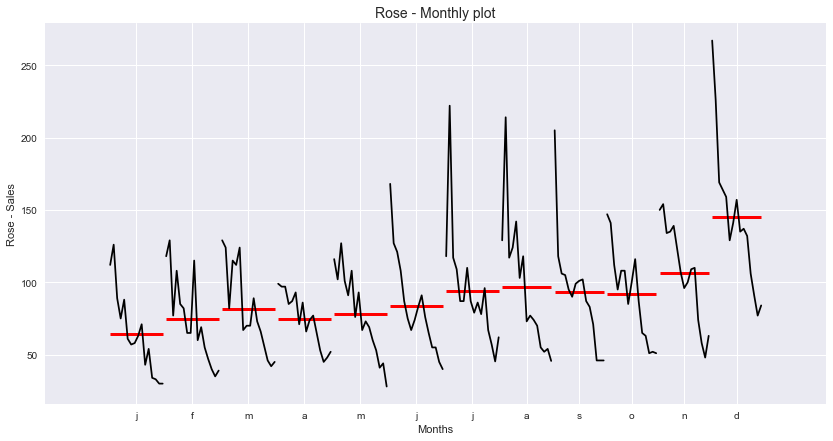

In [388]:
month_plot(df['Rose'],ylabel='Rose - Sales')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize=14)

This plot shows us the behaviour of the Time Series  across various months. The red line is the median value.

## Plot a graph of monthly sales across years.

### Sparkling

In [389]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

Text(0.5, 1.0, 'Sparkling - Monthly sales over years')

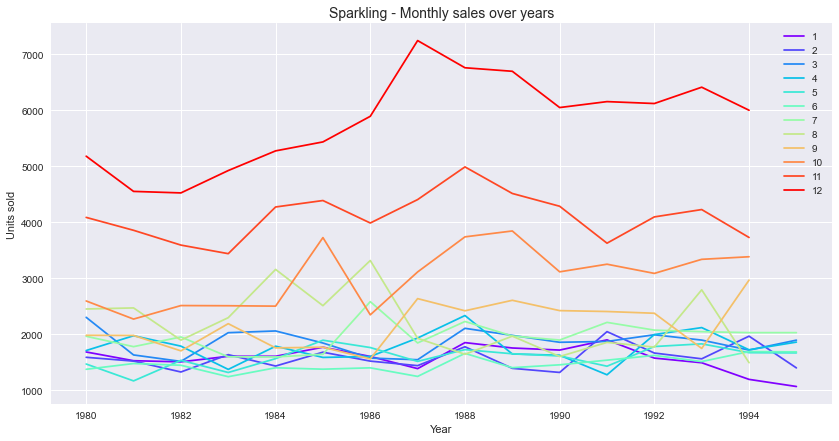

In [390]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14)

### Rose

In [391]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.336957   45.673913   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

Text(0.5, 1.0, 'Rose - Monthly sales over years')

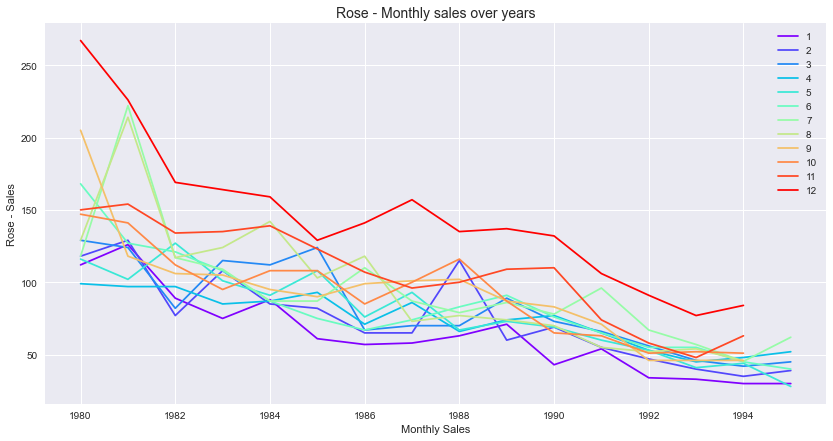

In [392]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Rose - Sales')
plt.xlabel('Monthly Sales')
plt.title('Rose - Monthly sales over years', fontsize=14)

## Plot the average sales per month and the month on month percentage change of sales.

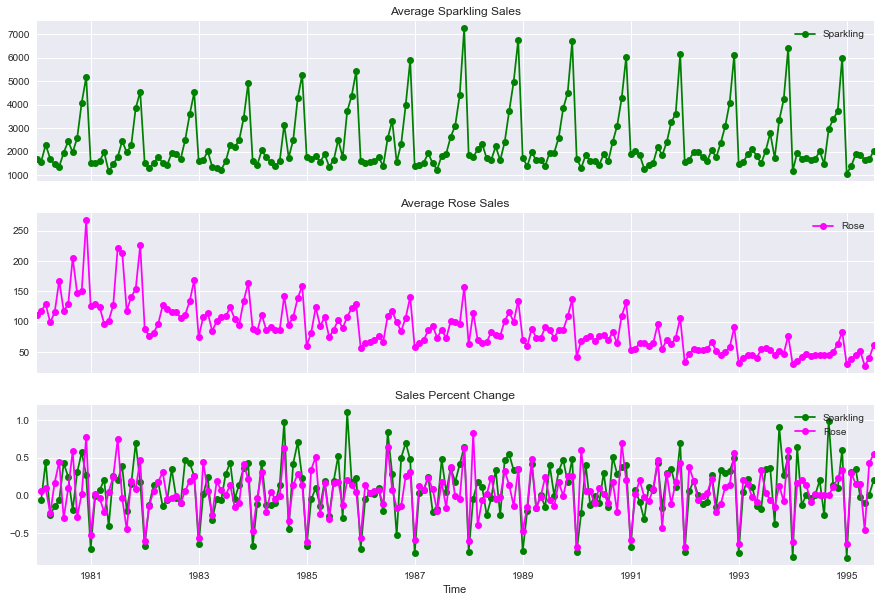

In [393]:
# group by date and get average Sparkling & Rose sales, and precent change
average_s    = df.groupby(df.index)['Sparkling'].mean()
average_r    = df.groupby(df.index)['Rose'].mean()
pct_change_s = df.groupby(df.index)['Sparkling'].sum().pct_change()
pct_change_r = df.groupby(df.index)['Rose'].sum().pct_change()

fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(15,10))

# plot average Sparkling sales over time(year-month)
ax1 = average_s.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales", color = 'green')
#ax1.set_xticks(range(len(average)))
#ax1.set_xticklabels(average.index.tolist())
# plot average Rose sales over time(year-month)
ax2 = average_r.plot(legend=True,ax=axis2,marker='o',title="Average Rose Sales", color = 'magenta')
#ax2.set_xticks(range(len(average)))
#ax2.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax3 = pct_change_s.plot(legend=True,ax=axis3,marker='o',color='green',title="Sales Percent Change")
ax3 = pct_change_r.plot(legend=True,ax=axis3,marker='o',color='magenta',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best');

## Decompose the Time Series and plot the different components.

 If the seasonality and residual components are independent of the trend, then you have an additive series. If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a multiplicative series.

In [394]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

## Sparkling

### Additive Decomposition

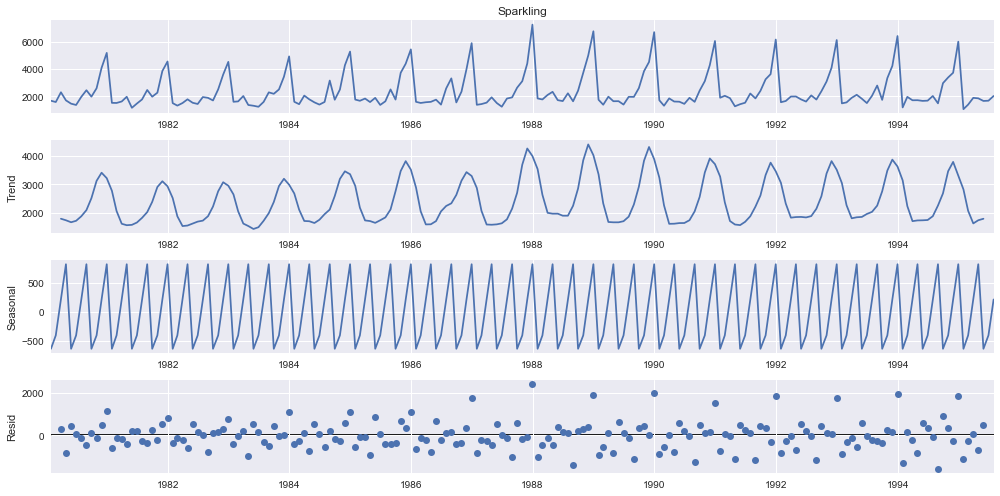

In [395]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive', freq=4)
decomposition.plot();

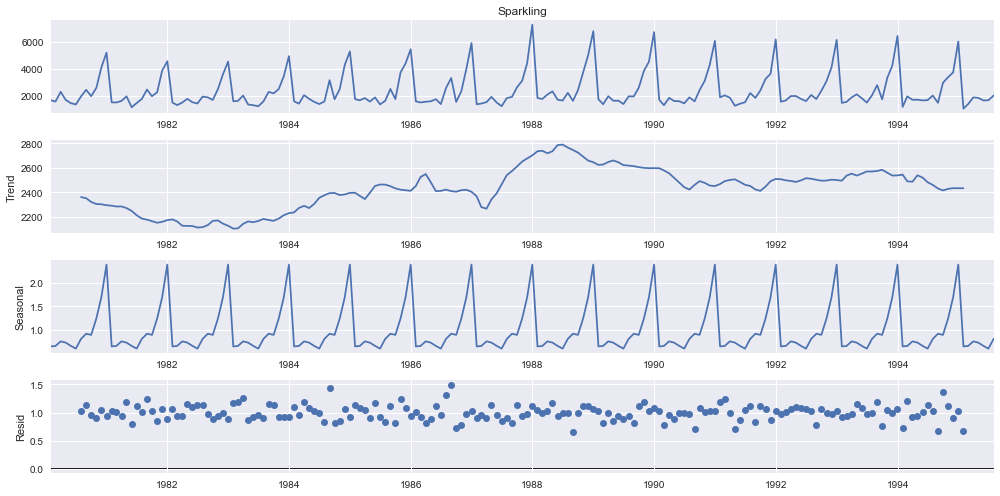

In [396]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();


In [397]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resi

In [398]:
detrend_ts = seasonality + residual
#deaseasonalized_ts.head(12)

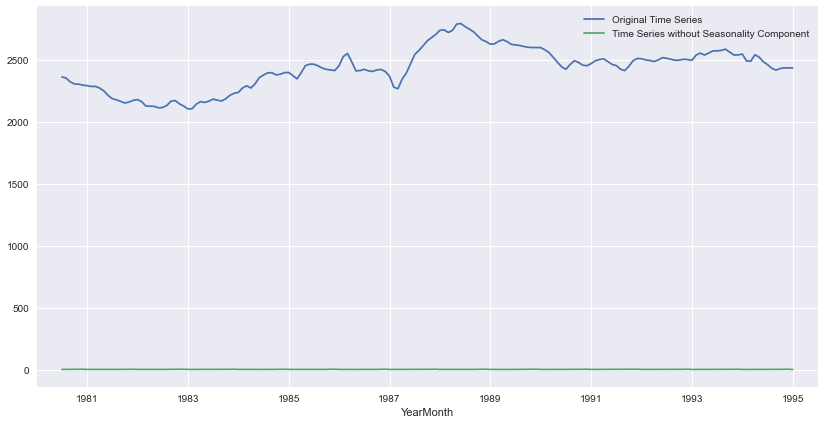

In [399]:
#df.Sparkling.plot()
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### Multiplicative

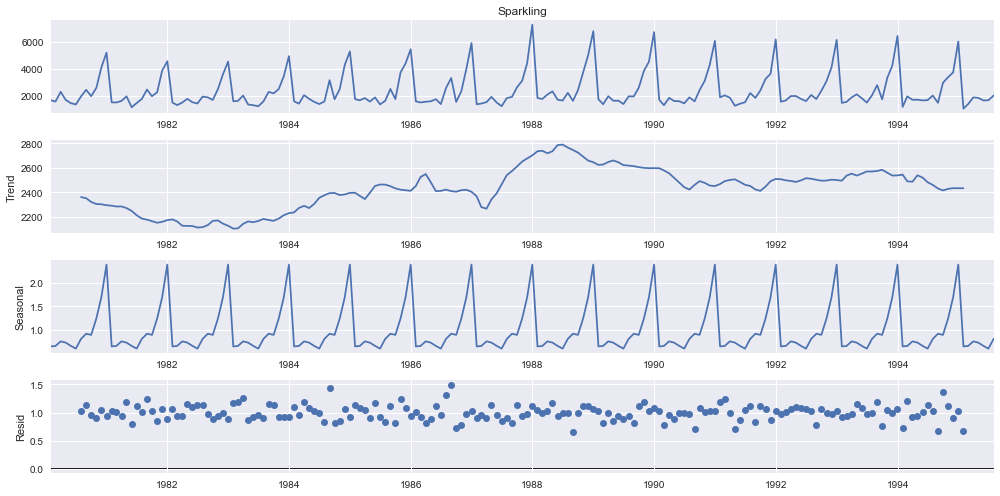

In [400]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [401]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resi

## Rose

### Additive Decomposition

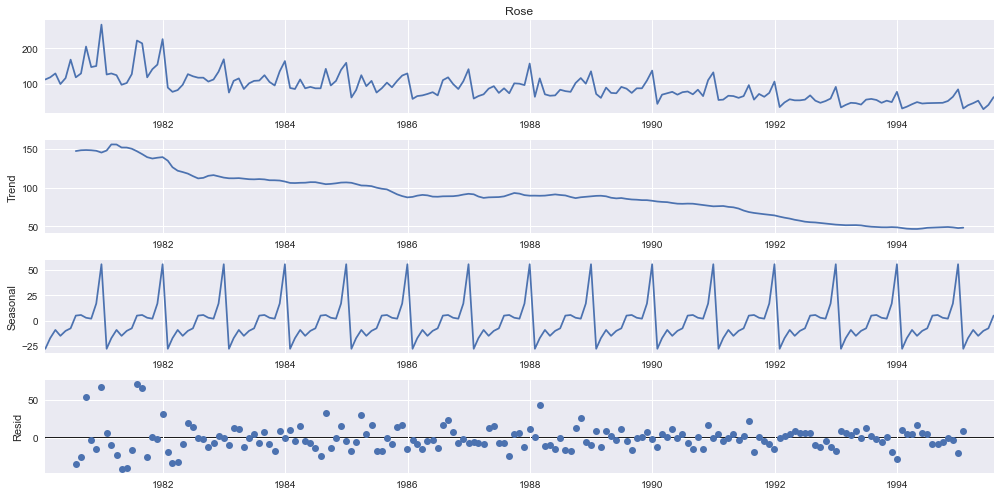

In [402]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [403]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.16148

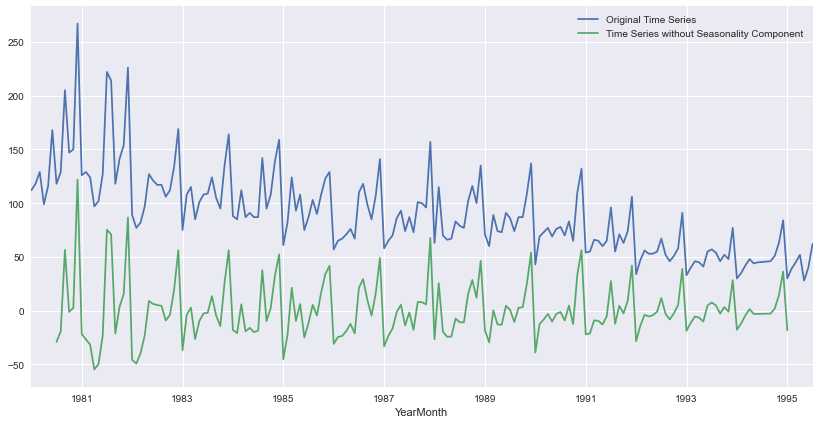

In [404]:
detrend_ts = seasonality + residual
df.Rose.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### Multiplicative Decomposition

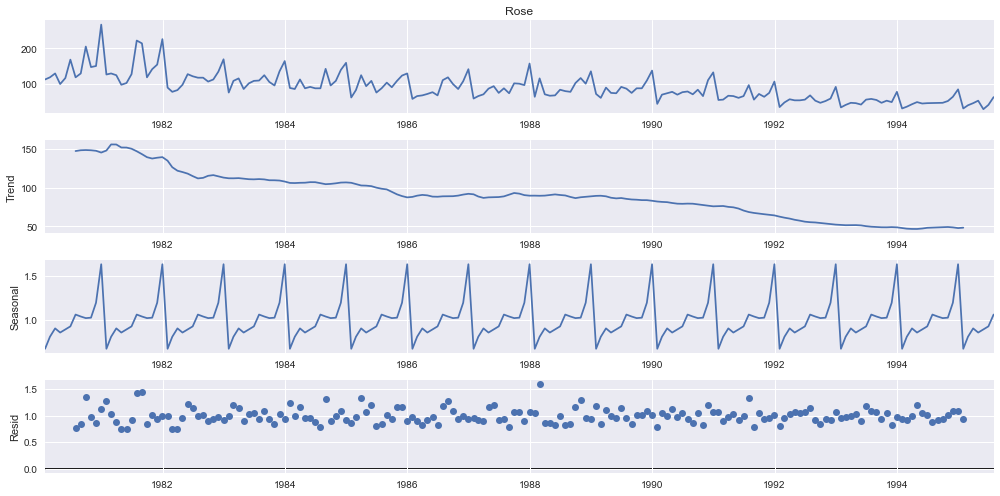

In [405]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [406]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype: fl

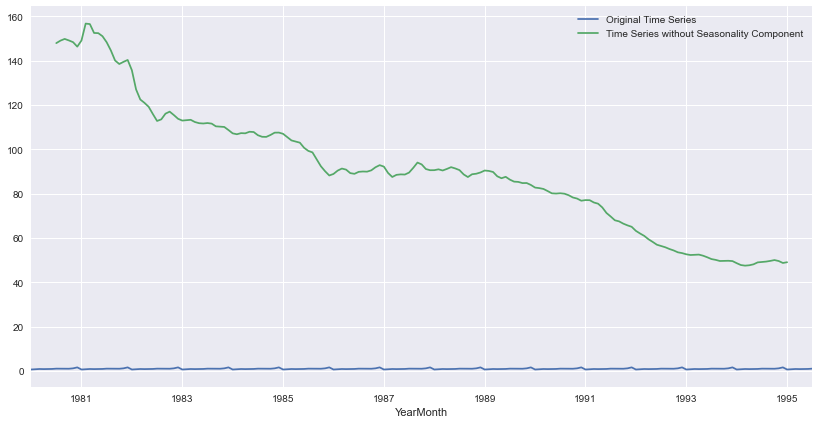

In [407]:
detrend_ts = trend + residual
#df.Rose.plot()
seasonality.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# Split the time series

In [408]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [409]:
from IPython.display import display

In [410]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling   Rose
YearMonth                   
1980-01-31       1686  112.0
1980-02-29       1591  118.0
1980-03-31       2304  129.0
1980-04-30       1712   99.0
1980-05-31       1471  116.0

Last few rows of Training Data


Sparkling   Rose
YearMonth                   
1990-08-31       1605   70.0
1990-09-30       2424   83.0
1990-10-31       3116   65.0
1990-11-30       4286  110.0
1990-12-31       6047  132.0

First few rows of Test Data


Sparkling  Rose
YearMonth                  
1991-01-31       1902  54.0
1991-02-28       2049  55.0
1991-03-31       1874  66.0
1991-04-30       1279  65.0
1991-05-31       1432  60.0

Last few rows of Test Data


Sparkling  Rose
YearMonth                  
1995-03-31       1897  45.0
1995-04-30       1862  52.0
1995-05-31       1670  28.0
1995-06-30       1688  40.0
1995-07-31       2031  62.0

In [411]:
print(train.shape)
print(test.shape)

(132, 2)
(55, 2)


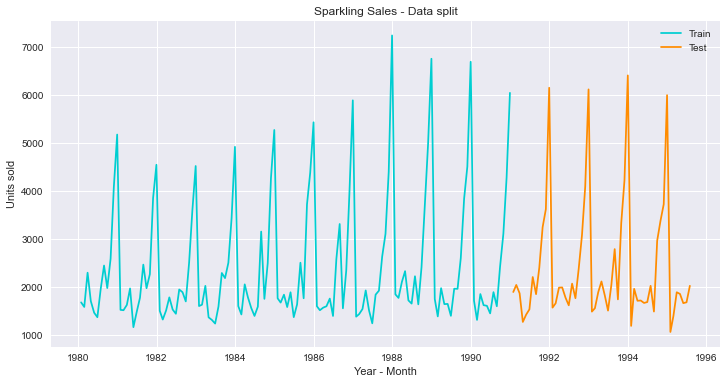

In [412]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling'], label = 'Train', color='darkturquoise')
plt.plot(test['Sparkling'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

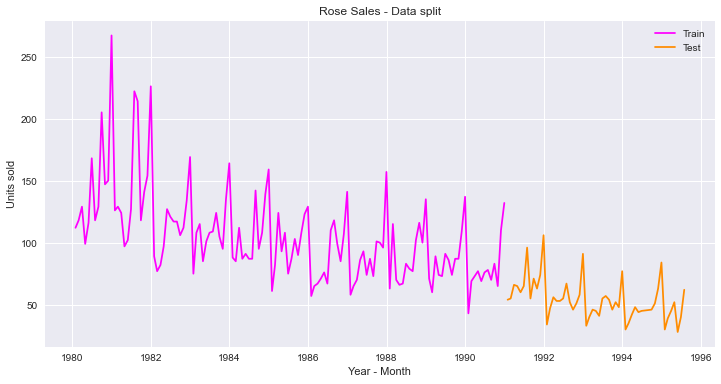

In [413]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train', color='magenta')
plt.plot(test['Rose'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

# Model 1: Linear Regression

In [414]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [415]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [416]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling   Rose  time
YearMonth                         
1980-01-31       1686  112.0     1
1980-02-29       1591  118.0     2
1980-03-31       2304  129.0     3
1980-04-30       1712   99.0     4
1980-05-31       1471  116.0     5 

Last few rows of Training Data 
             Sparkling   Rose  time
YearMonth                         
1990-08-31       1605   70.0   128
1990-09-30       2424   83.0   129
1990-10-31       3116   65.0   130
1990-11-30       4286  110.0   131
1990-12-31       6047  132.0   132 

First few rows of Test Data 
             Sparkling  Rose  time
YearMonth                        
1991-01-31       1902  54.0   133
1991-02-28       2049  55.0   134
1991-03-31       1874  66.0   135
1991-04-30       1279  65.0   136
1991-05-31       1432  60.0   137 

Last few rows of Test Data 
             Sparkling  Rose  time
YearMonth                        
1995-03-31       1897  45.0   183
1995-04-30       1862  52.0   184
1995

In [417]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

### Sparkling

In [418]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

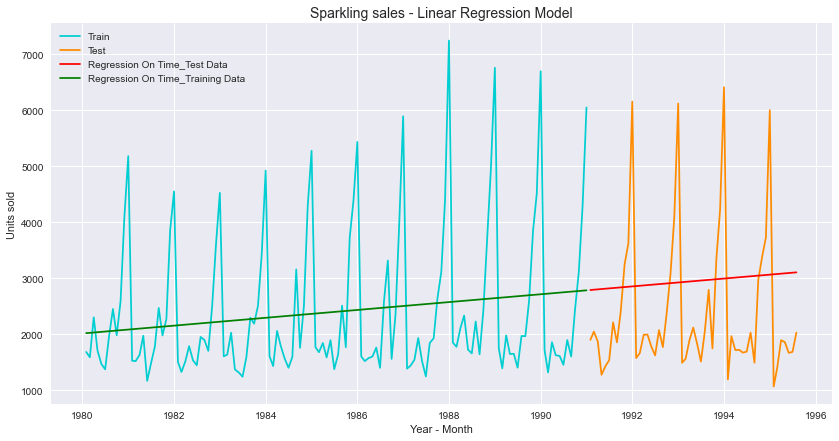

In [419]:

plt.plot( train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14);

### Rose

In [420]:
lr2 = LinearRegression().fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

In [421]:
LinearRegression_train['RegOnTime_rose']        = lr2.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_rose']         = lr2.predict(LinearRegression_test[['time']])

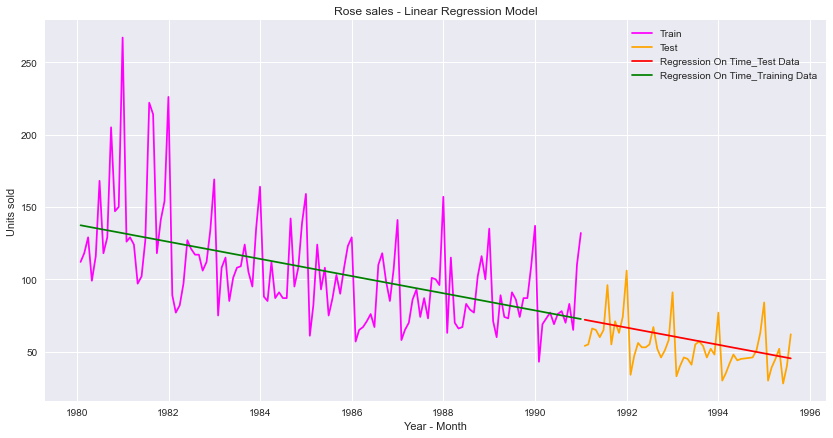

In [422]:
#plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose sales - Linear Regression Model');

### Model Evaluation

In [423]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [424]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))

For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [425]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))

For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [426]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_train, mape_rose_model1_train))

For RegressionOnTime forecast on the Rose Training Data:  RMSE is 30.718 and MAPE is 21.22


In [427]:
## Rose testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_test, mape_rose_model1_test))

For RegressionOnTime forecast on the Rose testing Data:  RMSE is 15.269 and MAPE is 22.82


In [428]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['RegressionOnTime'])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

In [429]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['RegressionOnTime'])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82

# Model 2: Naive forecast

In [430]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

### Sparkling

In [431]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

YearMonth
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [432]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

YearMonth
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

Text(0.5, 1.0, 'Sparkling - Naive Forecast')

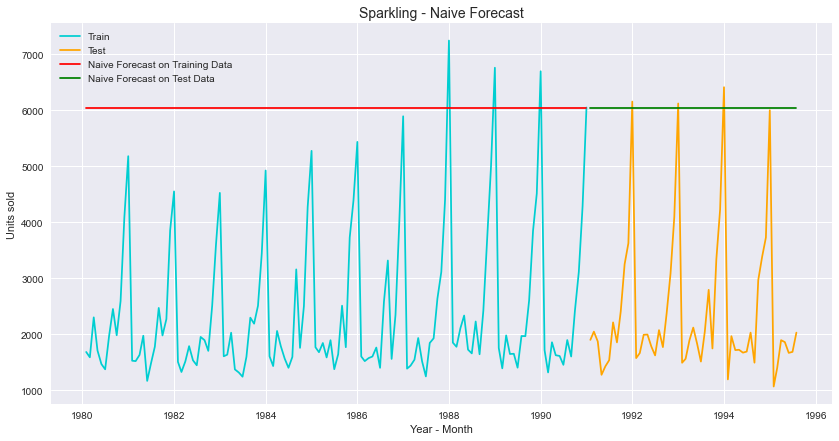

In [433]:
#plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)

### Rose

In [434]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

YearMonth
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: rose_naive, dtype: float64

In [435]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

Text(0.5, 1.0, 'Rose - Naive Forecast')

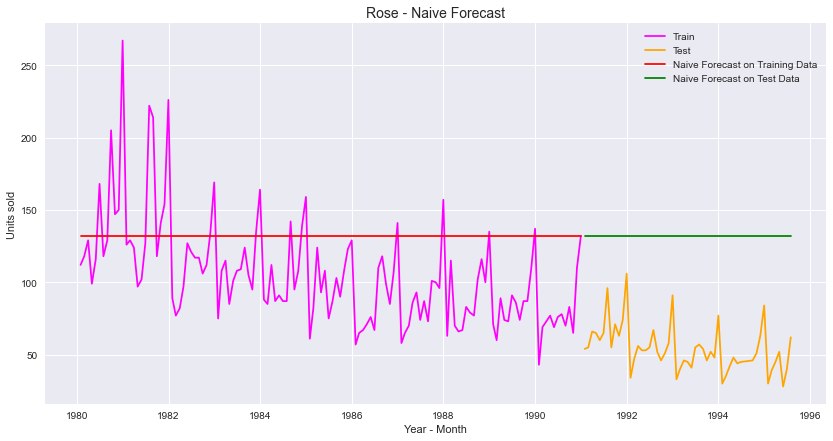

In [436]:
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)

### Model Evauation

In [437]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [438]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [439]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast on the Rose Training Data:  RMSE is 45.064 and MAPE is 36.38


In [440]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [441]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

In [442]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10

## Model 3: Simple Average

In [443]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

### Sparkling

In [444]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

YearMonth
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [445]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

YearMonth
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Sparkling - SimpleAverage Forecast')

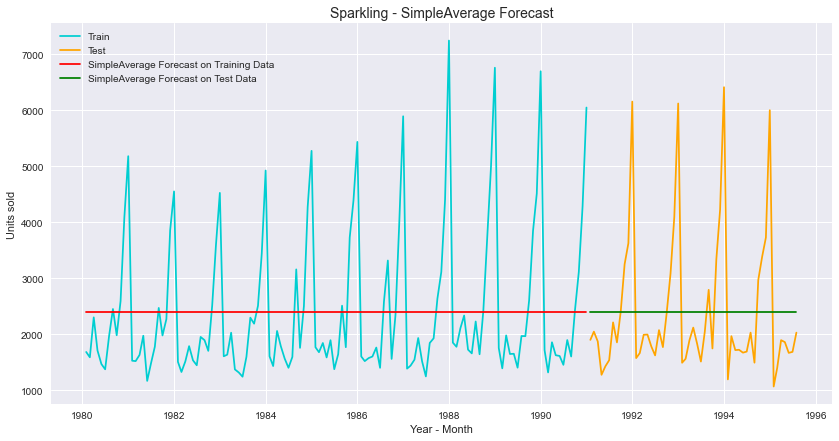

In [446]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)

### Rose

In [447]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

YearMonth
1980-01-31    104.939394
1980-02-29    104.939394
1980-03-31    104.939394
1980-04-30    104.939394
1980-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

In [448]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

YearMonth
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Rose - SimpleAverage Forecast')

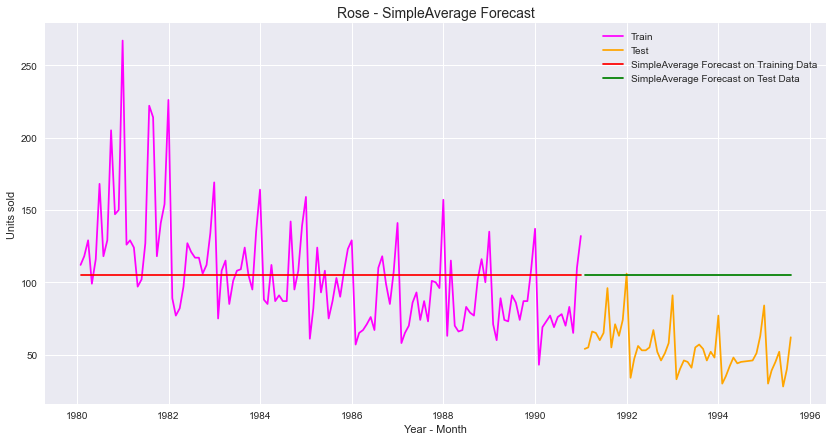

In [449]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)

### Model Evaluation

In [450]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [451]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [452]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [453]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast on the Rose Testing Data:  RMSE is 53.460 and MAPE is 94.93


In [454]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90

In [455]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93

## Model 4: Moving Average

In [456]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling   Rose
YearMonth                   
1980-01-31       1686  112.0
1980-02-29       1591  118.0
1980-03-31       2304  129.0
1980-04-30       1712   99.0
1980-05-31       1471  116.0

In [457]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Sparkling   Rose  Spark_Trailing_2  Spark_Trailing_4  \
YearMonth                                                          
1980-01-31       1686  112.0               NaN               NaN   
1980-02-29       1591  118.0            1638.5               NaN   
1980-03-31       2304  129.0            1947.5               NaN   
1980-04-30       1712   99.0            2008.0           1823.25   
1980-05-31       1471  116.0            1591.5           1769.50   

            Spark_Trailing_6  Spark_Trailing_9  Rose_Trailing_2  \
YearMonth                                                         
1980-01-31               NaN               NaN              NaN   
1980-02-29               NaN               NaN            115.0   
1980-03-31               NaN               NaN            123.5   
1980-04-30               NaN               NaN            114.0   
1980-05-31               NaN               NaN            107.5   

            Rose_Trailing_4  Rose_Trailing_6  Rose_Trailing_9  
YearMonth                                                      
1980-01-31              NaN              NaN              NaN  
1980-02-29              NaN              NaN              NaN  
1980-03-31              NaN              NaN              NaN  
1980-04-30            114.5              NaN              NaN  
1980-05-31            115.5              NaN              NaN

### Sparkling

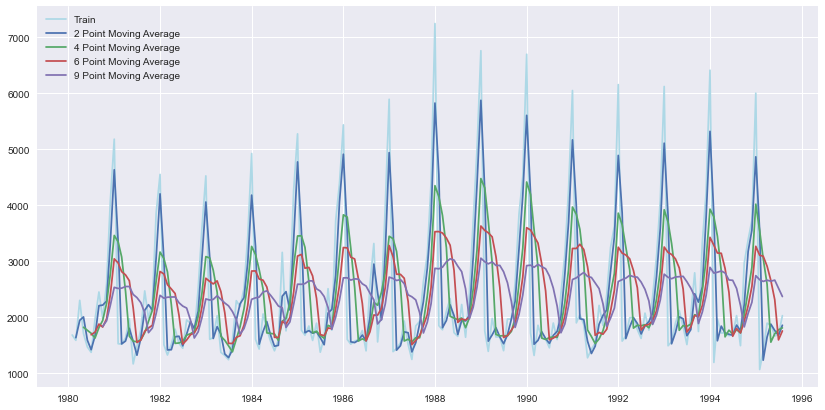

In [458]:
plt.plot(MovingAverage['Sparkling'], label='Train', color='lightblue')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [459]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Sparkling - Trailing Moving Average Forecast')

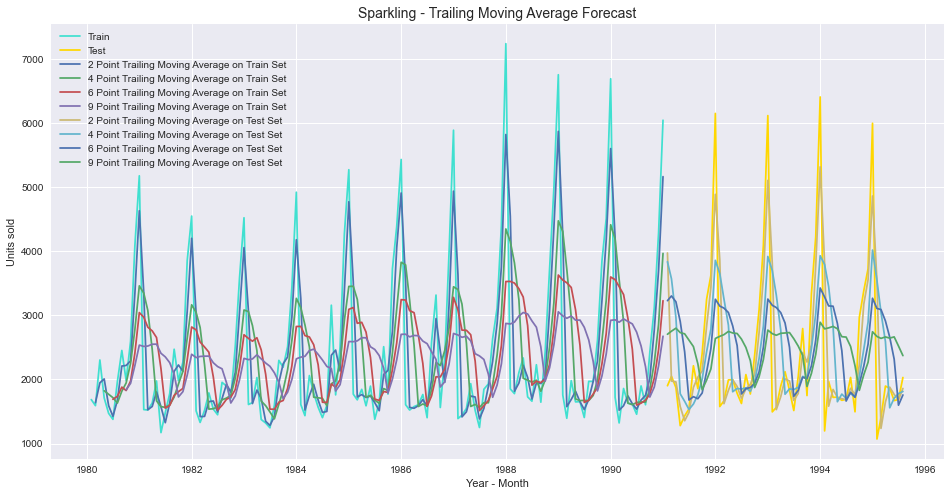

In [460]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14)

### Rose

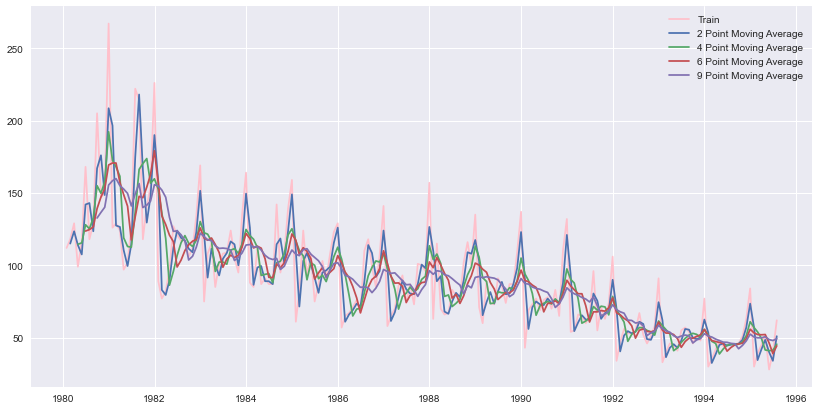

In [461]:
plt.plot(MovingAverage['Rose'], label='Train', color='pink')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Rose - Trailing Moving Average Forecast')

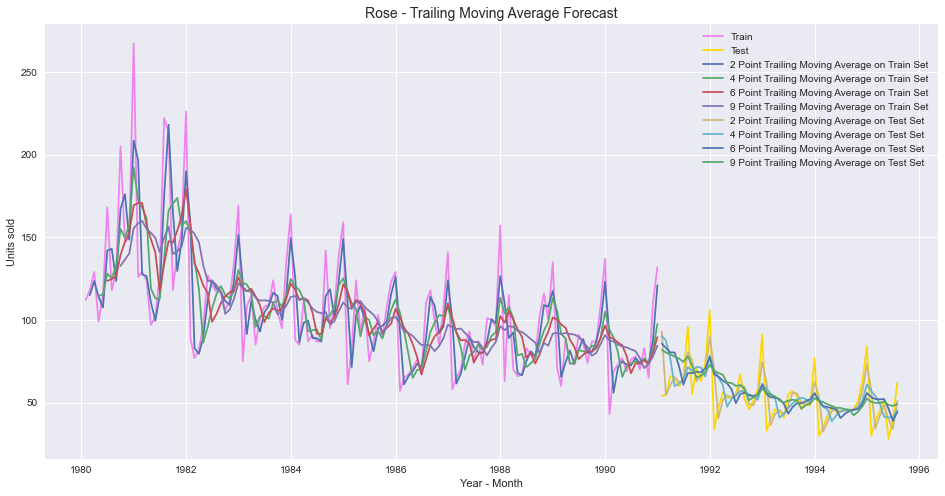

In [462]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14)

### Model Evaluation

In [463]:
## Test Data - rmse_spark and mape_spark --> 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [464]:
## Test Data - rmse_rose and mape_rose --> 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose --> 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose --> 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose --> 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [465]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86

In [466]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01

## Model 5: Simple Exponential Smoothing

In [467]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [468]:
SES_train = train.copy()
SES_test = test.copy()

In [469]:
SES_train['Sparkling'].head()

YearMonth
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [470]:
SES_train['Rose'].head()

YearMonth
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
Name: Rose, dtype: float64

### Sparkling

In [471]:
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

Test: For alpha = 0.05,  RMSE is 1316.4117 MAPE is 45.50
For smoothing level = 0.05,  Initial level 1686.00


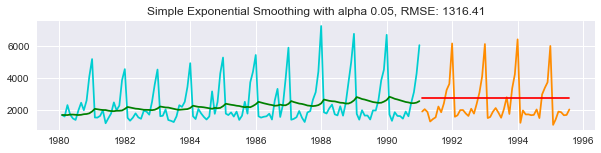

Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


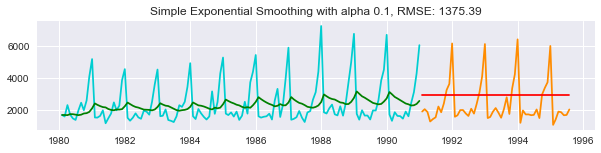

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


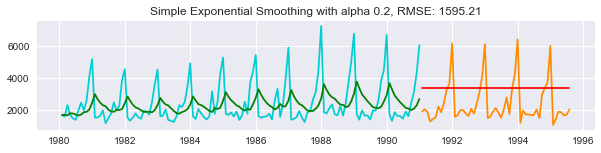

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


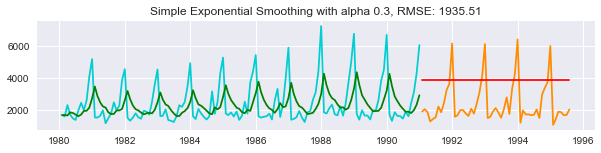

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


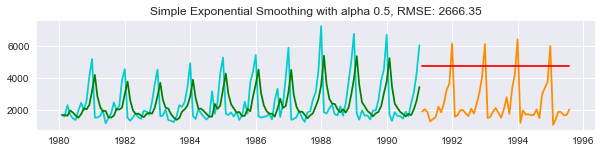

Test: For alpha = 0.99,  RMSE is 3847.5490 MAPE is 152.21
For smoothing level = 0.99,  Initial level 1686.00


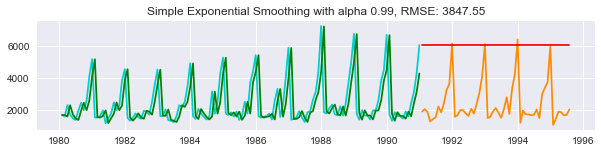

In [472]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
   # plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
   # plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    #plt.legend(loc='best') 
    plt.show();

Will let the model choose the right alpha

In [473]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

In [474]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [475]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling   Rose  predict_spark
YearMonth                                  
1980-01-31       1686  112.0    1818.535750
1980-02-29       1591  118.0    1811.961001
1980-03-31       2304  129.0    1800.999709
1980-04-30       1712   99.0    1825.952226
1980-05-31       1471  116.0    1820.299357

In [476]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  Rose  predict_spark
YearMonth                                 
1991-01-31       1902  54.0    2724.932624
1991-02-28       2049  55.0    2724.932624
1991-03-31       1874  66.0    2724.932624
1991-04-30       1279  65.0    2724.932624
1991-05-31       1432  60.0    2724.932624

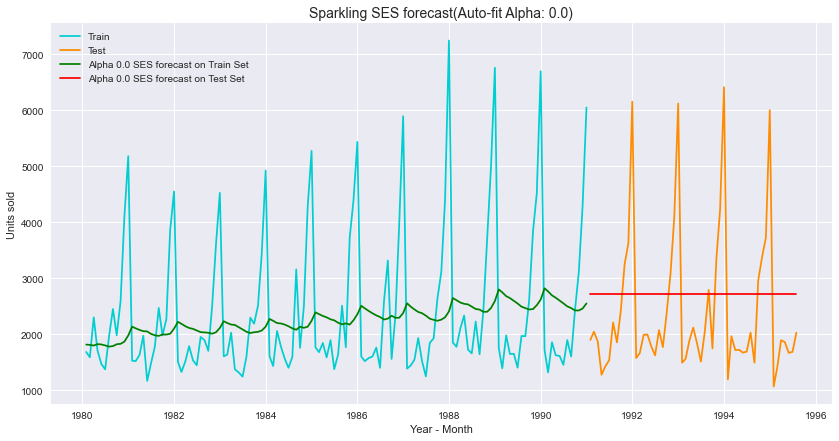

In [477]:
## Plotting on both the Training and Test data

#plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.0 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.0 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.0)', fontsize = 14);

#print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))

### Rose

In [478]:
model_rose = SimpleExpSmoothing(SES_train['Rose'])
#model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)

Test: For alpha = 0.10,  RMSE is 36.8278 MAPE is 63.94
For smoothing level = 0.10,  Initial level 112.00


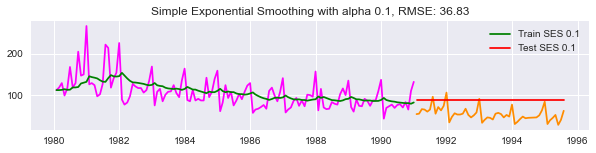

Test: For alpha = 0.20,  RMSE is 41.3617 MAPE is 72.21
For smoothing level = 0.20,  Initial level 112.00


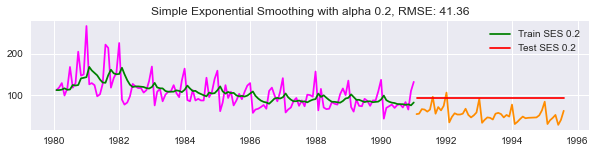

Test: For alpha = 0.30,  RMSE is 47.5046 MAPE is 83.71
For smoothing level = 0.30,  Initial level 112.00


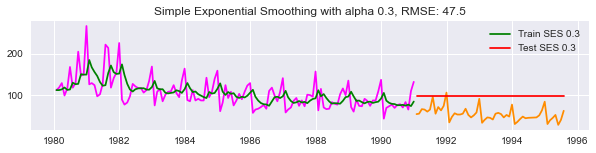

Test: For alpha = 0.50,  RMSE is 59.6416 MAPE is 106.81
For smoothing level = 0.50,  Initial level 112.00


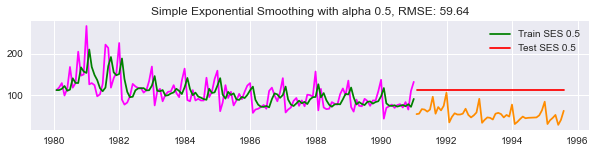

Test: For alpha = 0.99,  RMSE is 79.4985 MAPE is 144.69
For smoothing level = 0.99,  Initial level 112.00


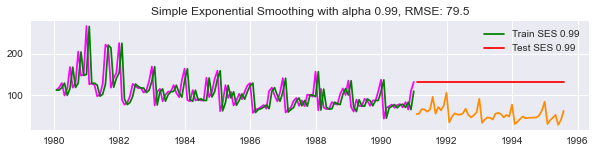

In [479]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_rose.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Rose']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Rose'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Rose'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Rose'], color = 'magenta')
    plt.plot(test['Rose'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

In [481]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

Sparkling   Rose  predict_spark  predict_rose
YearMonth                                                
1980-01-31       1686  112.0    1818.535750    134.387202
1980-02-29       1591  118.0    1811.961001    132.176481
1980-03-31       2304  129.0    1800.999709    130.776564
1980-04-30       1712   99.0    1825.952226    130.601129
1980-05-31       1471  116.0    1820.299357    127.480539

In [482]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  Rose  predict_spark  predict_rose
YearMonth                                               
1991-01-31       1902  54.0    2724.932624     87.104983
1991-02-28       2049  55.0    2724.932624     87.104983
1991-03-31       1874  66.0    2724.932624     87.104983
1991-04-30       1279  65.0    2724.932624     87.104983
1991-05-31       1432  60.0    2724.932624     87.104983

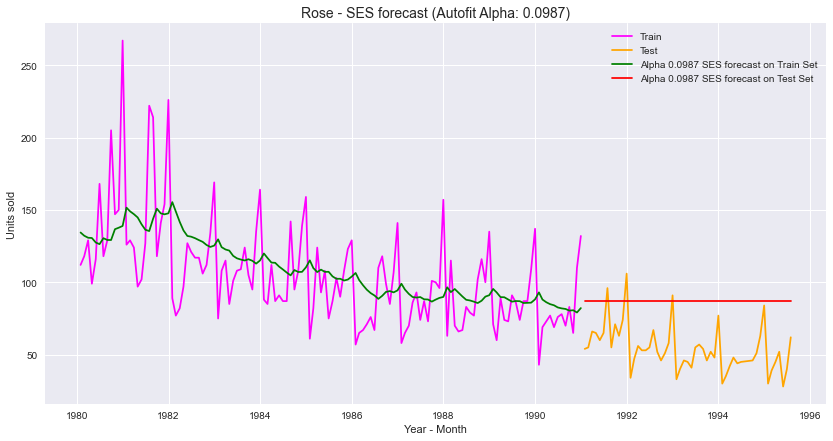

In [483]:
#plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train', color = 'magenta')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

### Model Evaluation

In [484]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1315.232 and MAPE is 39.92


In [485]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1316.035 and MAPE is 45.47


In [486]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [487]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [488]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.00'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86
SES Alpha 0.00    1316.035487      45.47

In [489]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01
SES Alpha 0.01    36.796004      63.88

## Model 6: Double Exponential Smoothing (Holt's Model)

In [490]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [491]:

DES_train = train.copy()
DES_test = test.copy()

### Sparkling

In [492]:
model_DES = Holt(DES_train['Sparkling'])

In [493]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,'Train MAPE': mape_spark_model6_train,
                                          'Test RMSE':rmse_spark_model6_test ,'Test MAPE':mape_spark_model6_test}, 
                                         ignore_index=True)

In [494]:
resultsDf_6.sort_values(by=['Test RMSE']).head(3)

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41

In [495]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1431.37       46.90    4288.43     155.25
3     0.1   0.4     1466.77       48.27    6042.38     219.09

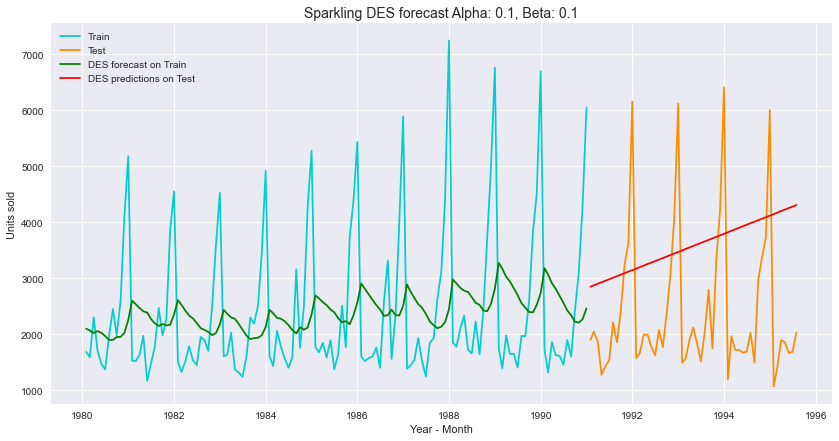

In [496]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

Trying auto fit by the model

In [497]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [498]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [499]:
alpha = model_DES_autofit.params['smoothing_level']
beta  =  model_DES_autofit.params['smoothing_trend']
alpha_6_1 = alpha
beta_6_1 = beta

In [500]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues
#DES_train.head()

In [501]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))
#DES_test.head()

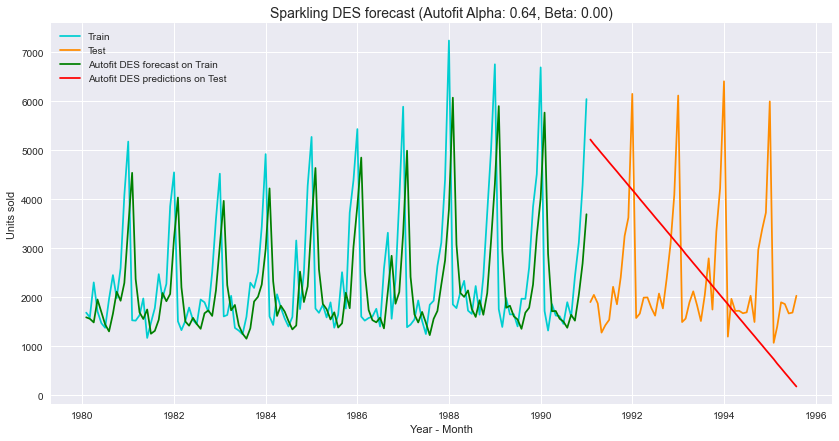

In [502]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.64, Beta: 0.00)', fontsize=14);
plt.legend(loc='best')

In [503]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_spark_model6_train
                                      ,'Train MAPE': mape_spark_model6_train,'Test RMSE':rmse_spark_model6_test
                                      ,'Test MAPE':mape_spark_model6_test}, ignore_index=True)

In [504]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

In [505]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

Auto fitted model shows better RMSE and MAPE in train, but not the best fit in test set

### Rose

In [506]:
model_DES_rose = Holt(DES_train['Rose'])

In [507]:
resultsDf_6_rose = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_rose',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test['predict_rose',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',i,j],squared=False)
        mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',i,j])
        
        rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',i,j],squared=False)
        mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',i,j])
        
        resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [508]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056911      64.02
1     0.1   0.2   32.685228       23.63  48.806921      83.29
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   32.925494       24.23  78.209401     131.33
20    0.3   0.1   33.528397       23.47  98.653063     170.12

In [509]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056911      64.02
1     0.1   0.2   32.685228       23.63  48.806921      83.29
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   32.925494       24.23  78.209401     131.33
3     0.1   0.4   33.179749       24.75  99.554566     165.49

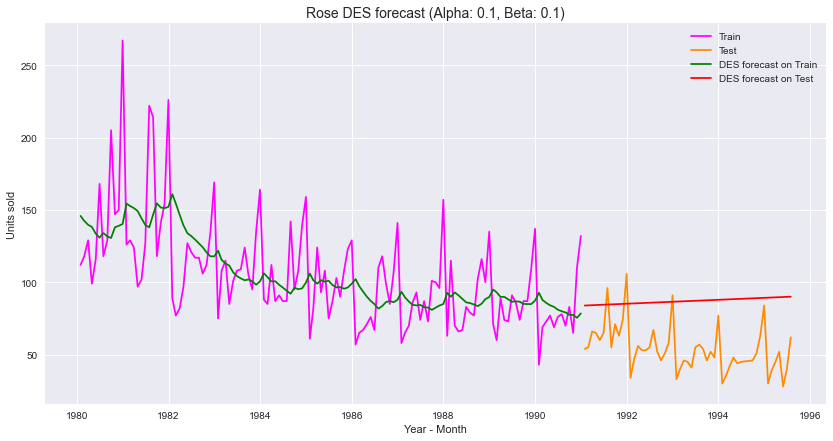

In [510]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_rose', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_rose', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

Attempting autofit

In [511]:
model_DES_rose_autofit = model_DES_rose.fit(optimized=True,use_brute=True)

In [512]:
model_DES_rose_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [513]:
alpha = model_DES_rose_autofit.params['smoothing_level']
beta = model_DES_rose_autofit.params['smoothing_trend']
alpha_6_2 = alpha
beta_6_2 = beta

In [514]:
DES_train['predict_rose',alpha,beta] = model_DES_rose_autofit.fittedvalues

In [515]:
DES_test['predict_rose',alpha,beta] = model_DES_rose_autofit.forecast(len(test['Rose']))

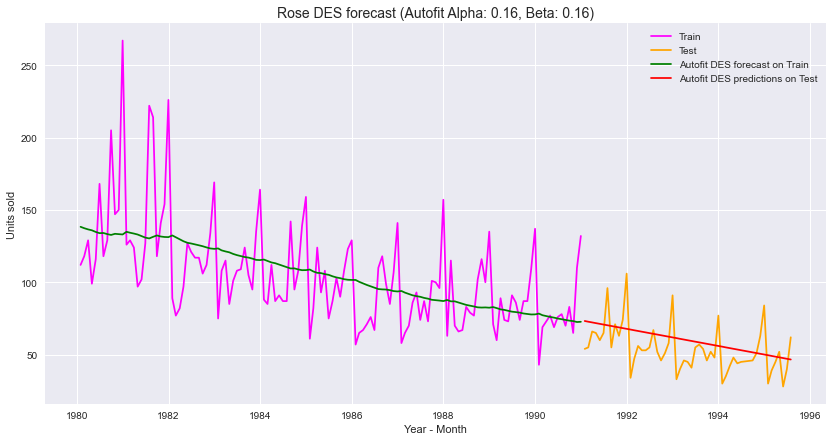

In [516]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'orange')

plt.plot(DES_train['predict_rose',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_rose',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0.16, Beta: 0.16)', fontsize=14)

plt.legend(loc='best')

In [517]:
rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',alpha,beta],squared=False)
mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',alpha,beta])
        
rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',alpha,beta],squared=False)
mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',alpha,beta])
        
resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [518]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
100  0.01755  0.000032   30.890794       21.61  15.706968      24.12
0    0.10000  0.100000   32.026565       22.78  37.056911      64.02
1    0.10000  0.200000   32.685228       23.63  48.806921      83.29
10   0.20000  0.100000   32.796403       23.06  65.731352     113.20
2    0.10000  0.300000   32.925494       24.23  78.209401     131.33

In [519]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
100  0.01755  0.000032   30.890794       21.61  15.706968      24.12
0    0.10000  0.100000   32.026565       22.78  37.056911      64.02
1    0.10000  0.200000   32.685228       23.63  48.806921      83.29
10   0.20000  0.100000   32.796403       23.06  65.731352     113.20
2    0.10000  0.300000   32.925494       24.23  78.209401     131.33

### Model Evaluation

In [520]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf


Test RMSE  Test MAPE
RegressionOnTime        1389.135175      50.15
NaiveModel              3864.279352     152.87
SimpleAverage           1275.081804      38.90
2 point TMA              813.400684      19.70
4 point TMA             1156.589694      35.96
6 point TMA             1283.927428      43.86
9 point TMA             1346.278315      46.86
SES Alpha 0.00          1316.035487      45.47
DES Alpha 0.1,Beta 0.1  1779.420000      67.23
DES Alpha 0.6,Beta 0.0  2007.238526      68.23

In [521]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_rose['Test RMSE'][100],resultsDf_6_rose['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_rose['Test MAPE'][100],resultsDf_6_rose['Test MAPE'][0]]}
                           ,index=['DES Alpha 0.16, Beta 0.16','DES Alpha 0.10, Beta 0.10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime           15.268885      22.82
NaiveModel                 79.718559     145.10
SimpleAverage              53.460350      94.93
2 point TMA                11.529278      13.54
4 point TMA                14.451364      19.49
6 point TMA                14.566269      20.82
9 point TMA                14.727594      21.01
SES Alpha 0.01             36.796004      63.88
DES Alpha 0.16, Beta 0.16  15.706968      24.12
DES Alpha 0.10, Beta 0.10  37.056911      64.02

## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [522]:
TES_train = train.copy()
TES_test = test.copy()

### Sparkling

In [523]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
#model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',freq='M')

In [524]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [525]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

In [526]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

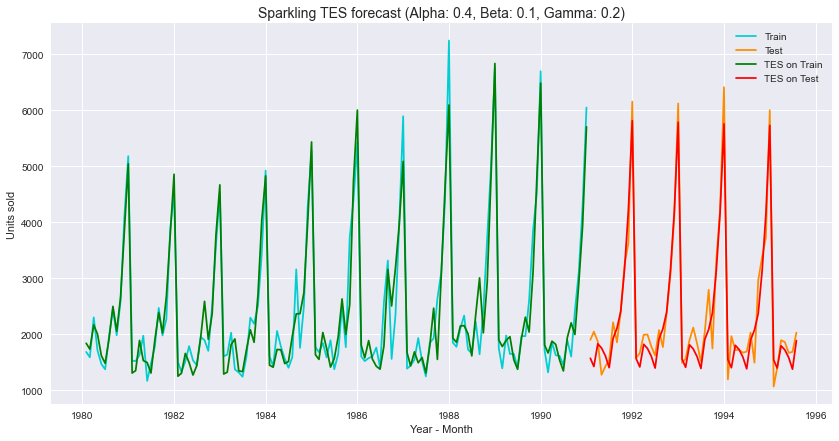

In [527]:
#plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')

#plt.plot(TES_train['predict_spark', 0.5, 0.1, 0.3], color = 'green', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Train')
#plt.plot(TES_test['predict_spark', 0.5, 0.1, 0.3], color='red', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

Attempt Autofit of TES

In [528]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [529]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [530]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [531]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [532]:
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

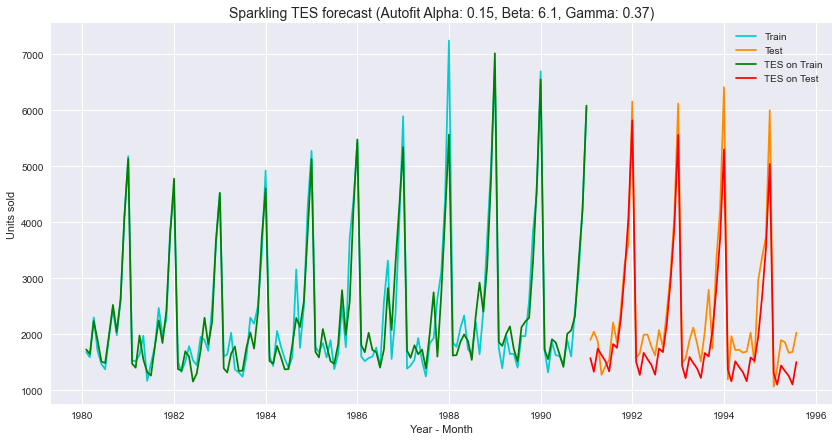

In [533]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.15, Beta: 6.1, Gamma: 0.37)', fontsize=14)

plt.legend(loc='best')

In [534]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [535]:
resultsDf_7_1.tail()

Alpha  Beta  Gamma     Train RMSE  Train MAPE     Test RMSE  Test MAPE
996    1.00  1.00    0.7   94040.964957     1036.30  1.074413e+06   28878.00
997    1.00  1.00    0.8  102196.953755      888.48  5.010607e+06   65738.32
998    1.00  1.00    0.9   77924.294413      876.07  4.318265e+05    6048.85
999    1.00  1.00    1.0  239917.432848     1303.21  1.254280e+05    3313.86
1000   0.11  0.06    0.4     356.974929       10.25  4.697680e+02      16.40

In [536]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

In [537]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

### Rose

In [538]:
model_TES_2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [539]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [540]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_rose',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_rose',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Rose']))
        
            rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',i,j,k],squared=False)
            mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',i,j,k])
        
            rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',i,j,k],squared=False)
            mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [541]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171621      13.19
11     0.1   0.2    0.2   20.140683       14.66   9.493832      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71
142    0.2   0.5    0.3   23.300524       17.35   9.885717      14.21
12     0.1   0.2    0.3   20.725703       14.88   9.896169      14.16

In [542]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171621      13.19
243    0.3   0.5    0.4   25.873405       17.54  10.375280      13.26
223    0.3   0.3    0.4   24.209084       16.78  10.169702      13.67
11     0.1   0.2    0.2   20.140683       14.66   9.493832      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71

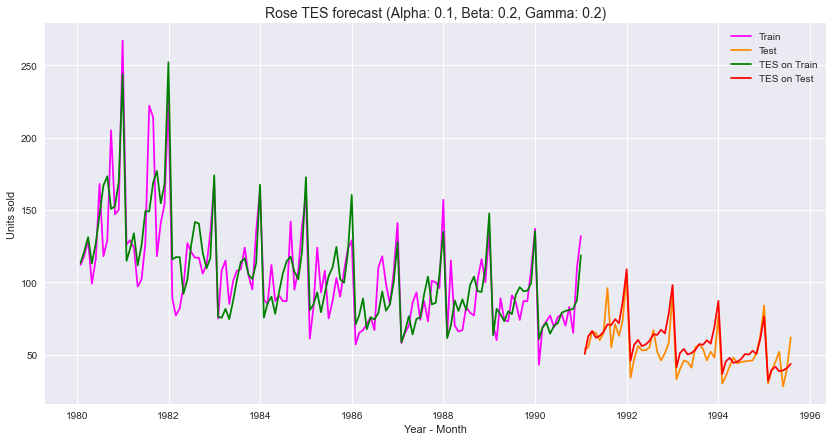

In [543]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

#plt.plot(TES_train['predict_rose', 0.2, 0.6, 0.2], color = 'green', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Train')
#plt.plot(TES_test['predict_rose', 0.2, 0.6, 0.2], color='red', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Test')

plt.plot(TES_train['predict_rose', 0.1, 0.2, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose', 0.1, 0.2, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

Attempt autofit

In [544]:
model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [545]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [546]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [547]:
TES_train['predict_rose',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_rose',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Rose']))

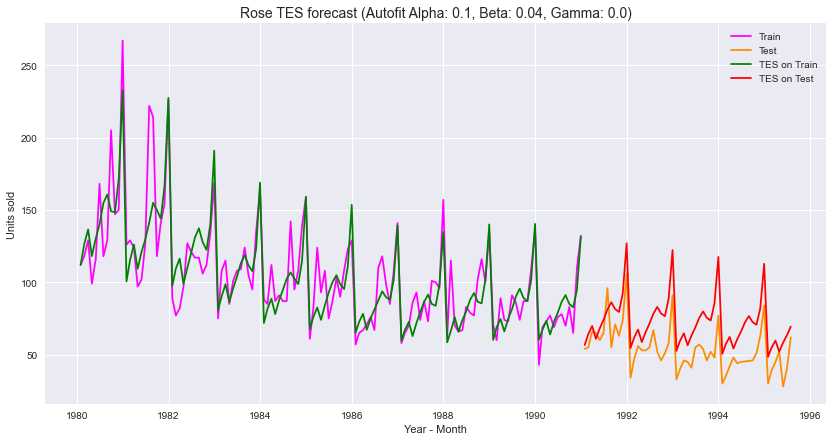

In [548]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.1, Beta: 0.04, Gamma: 0.0)', fontsize=14)

plt.legend(loc='best')

In [549]:
rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma])
        
rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [550]:
resultsDf_7_2.tail()

Alpha      Beta     Gamma    Train RMSE  Train MAPE     Test RMSE  \
996   1.000000  1.000000  0.700000  30724.126331     4617.55  23029.955358   
997   1.000000  1.000000  0.800000   1218.755446      493.75   9626.710890   
998   1.000000  1.000000  0.900000  14150.253251     2303.41   9691.905408   
999   1.000000  1.000000  1.000000   1768.254189      614.79   8138.618610   
1000  0.065694  0.051929  0.000004     18.405018       12.55     21.019341   

      Test MAPE  
996    11836.01  
997     8580.97  
998     7916.16  
999     6811.03  
1000      35.16

In [551]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171621      13.19
11     0.1   0.2    0.2   20.140683       14.66   9.493832      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71
142    0.2   0.5    0.3   23.300524       17.35   9.885717      14.21
12     0.1   0.2    0.3   20.725703       14.88   9.896169      14.16

In [552]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171621      13.19
243    0.3   0.5    0.4   25.873405       17.54  10.375280      13.26
223    0.3   0.3    0.4   24.209084       16.78  10.169702      13.67
11     0.1   0.2    0.2   20.140683       14.66   9.493832      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682585      13.71

### Model Evaluation

In [553]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.15, Beta 0.00, Gamma 0.37'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40

In [554]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.00                         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

In [555]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.2','TES Alpha 0.11, Beta 0.05, Gamma 0.00'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_ro])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16

In [556]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
DES Alpha 0.16, Beta 0.16              15.706968      24.12
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

# Plot all above models

Text(0.5, 1.0, 'SPARKLING : Forecast Vs Actual Test set')

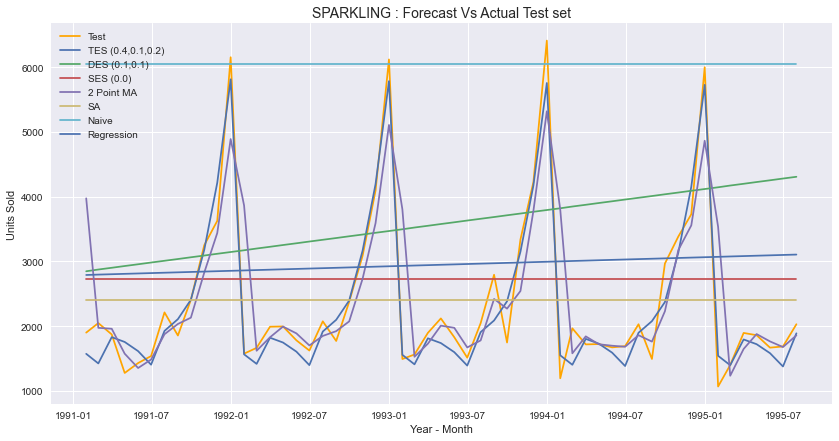

In [557]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')
#TES
#plt.plot(TES_train['predict_spark',0.4,0.1,0.2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_spark',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_spark'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['spark_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES (0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.0)')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14)


Text(0.5, 1.0, 'ROSE : Forecast Vs Actual Test Data')

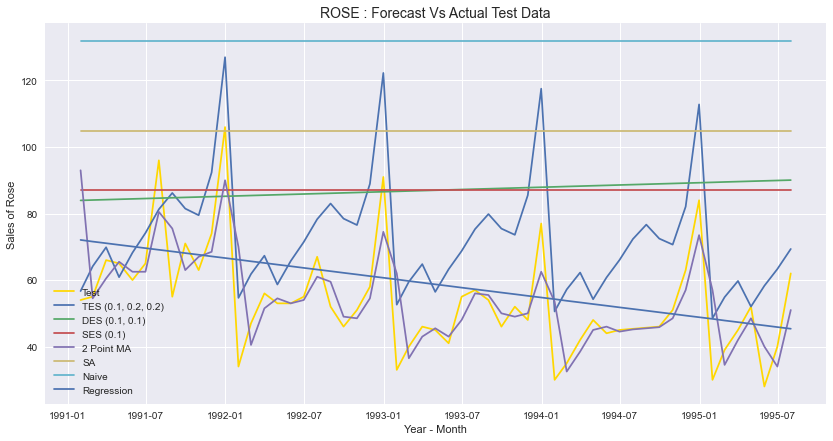

In [558]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')
#TES
#plt.plot(TES_train['predict_rose',alpha_7_2,beta_7_2,gamma_7_2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_rose',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_rose'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['rose_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES (0.1, 0.2, 0.2)')
#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES (0.1, 0.1)')
#SES
plt.plot(SES_test['predict_rose'],  label='SES (0.1)')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('ROSE : Forecast Vs Actual Test Data', fontsize=14)


# ARIMA Models

## Check for stationarity of the whole Time Series data.

In [559]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

### Sparkling

Original series

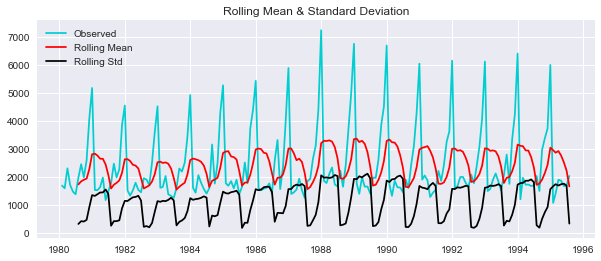

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [560]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'],'darkturquoise')

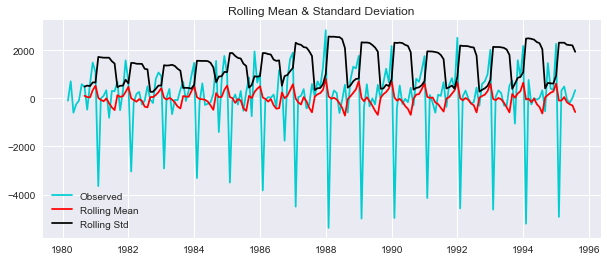

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [561]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'].diff().dropna(),'darkturquoise')

We see that at 5% significant level the Time Series is non-stationary. But the seasonality is multiplicative as the Std deviation and mean varies according to the change in trend

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

Difference of original series

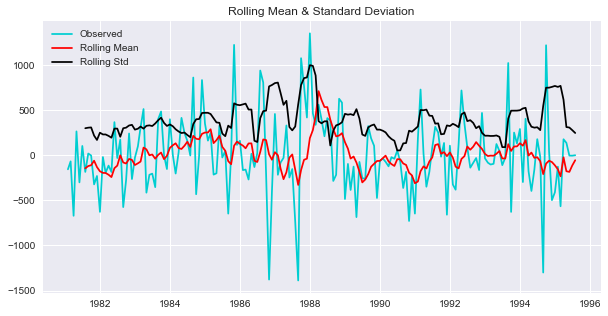

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [562]:
plt.figure(figsize=(10,5))
test_stationarity(df['Sparkling'].diff(12).dropna(), 'darkturquoise')

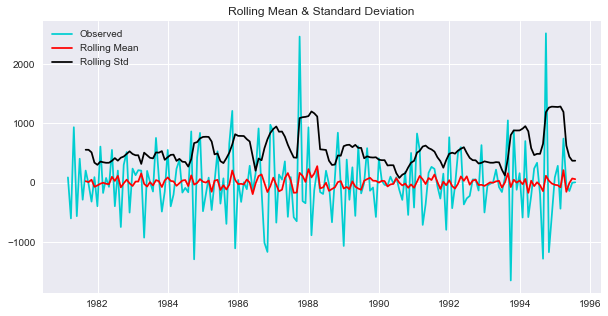

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [563]:
plt.figure(figsize=(10,5))
test_stationarity((df['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary. But seasonality is multiplicative

Log of series

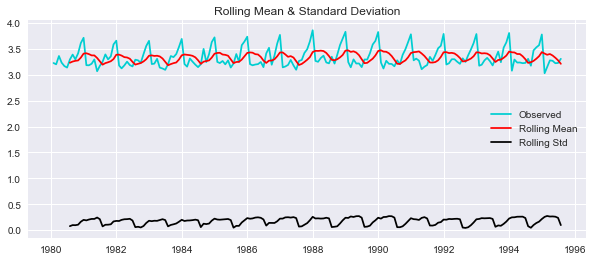

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [564]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']), 'darkturquoise')

Seasonality is now additive but non stationary

Difference of log of series

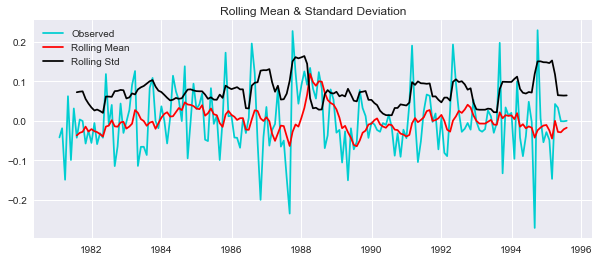

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [565]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']).diff(12).dropna(),  'darkturquoise')

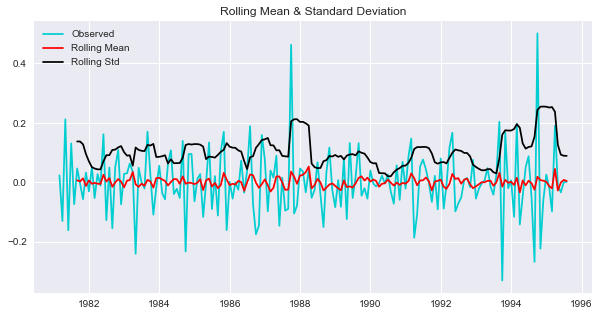

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [566]:
plt.figure(figsize=(10,5))
test_stationarity((np.log10(df['Sparkling']).diff(12).dropna()).diff().dropna(),  'darkturquoise')

### Rose

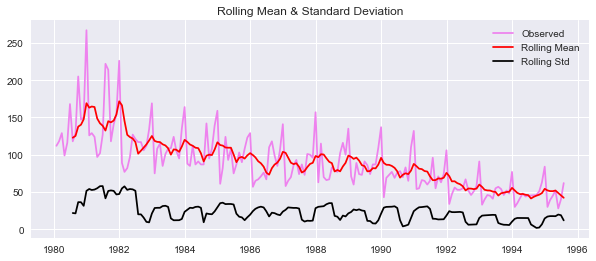

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [567]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'], 'violet')

We see that at 5% significant level the Time Series is non-stationary.

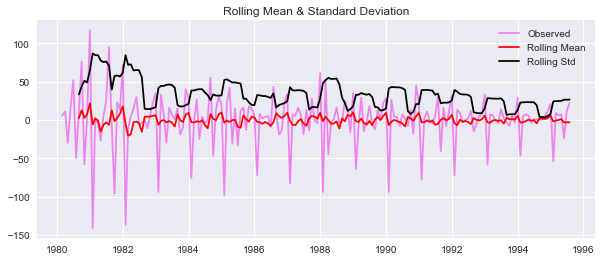

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [568]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'].diff().dropna(), 'violet')

At difference of order 1, Rose Time Series is stationary with no trend. Got visible seasoality (additive or mutiplicative?)

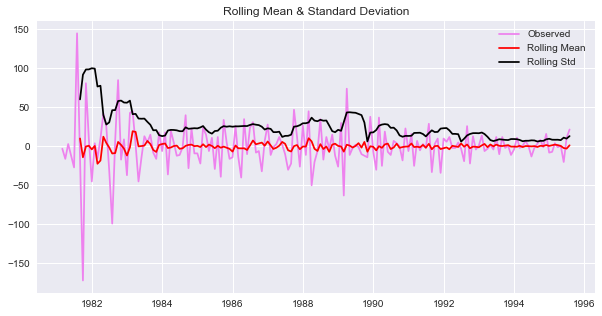

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [569]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

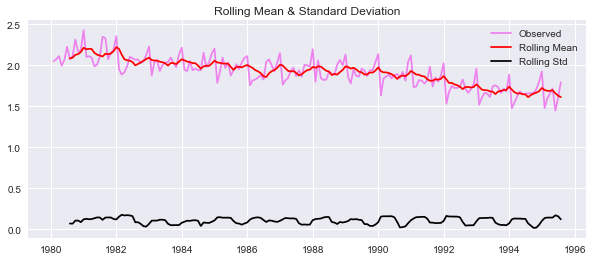

Results of Dickey-Fuller Test:
Test Statistic                  -0.422555
p-value                          0.906264
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [570]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Rose']), 'violet')

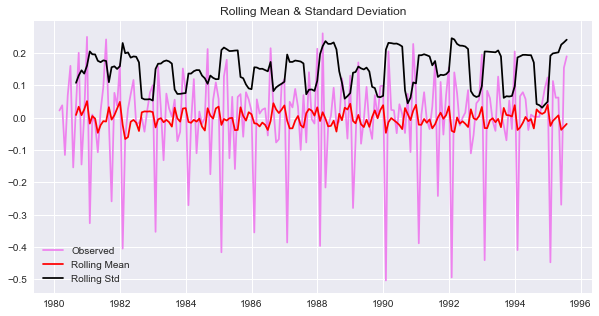

Results of Dickey-Fuller Test:
Test Statistic                -8.669696e+00
p-value                        4.581847e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [571]:
plt.figure(figsize=(10,5))
test_stationarity(np.log10(df['Rose']).diff().dropna(), 'violet')

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [572]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Sparkling

ACF Plots

<Figure size 720x360 with 0 Axes>

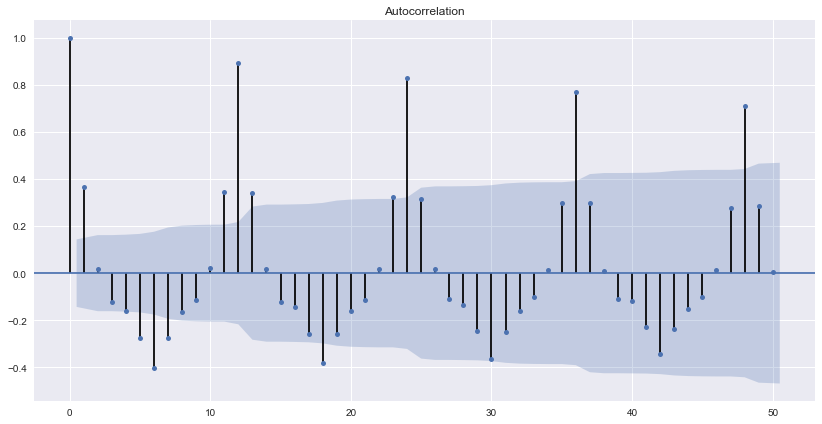

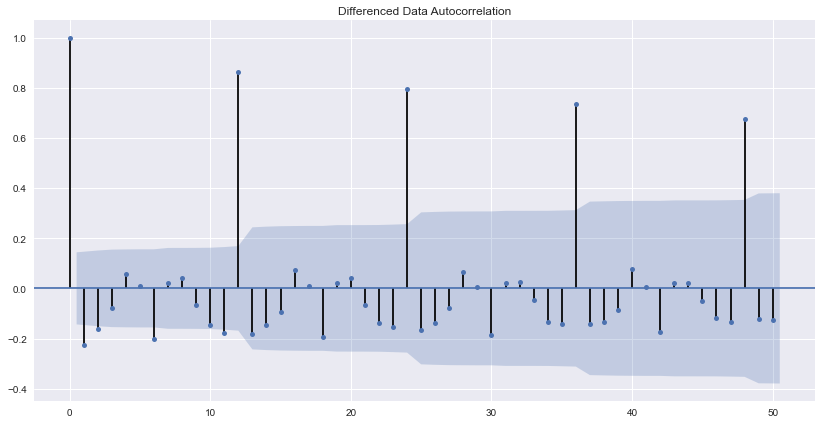

In [573]:
plt.figure(figsize=(10,5))
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

PACF Plots

<Figure size 720x360 with 0 Axes>

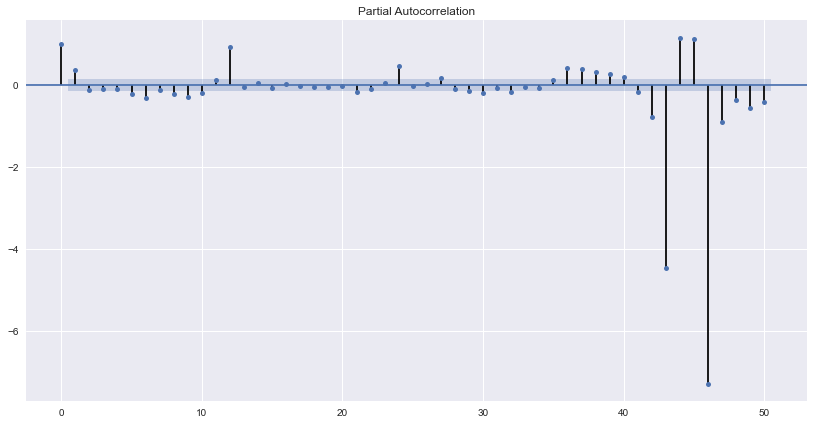

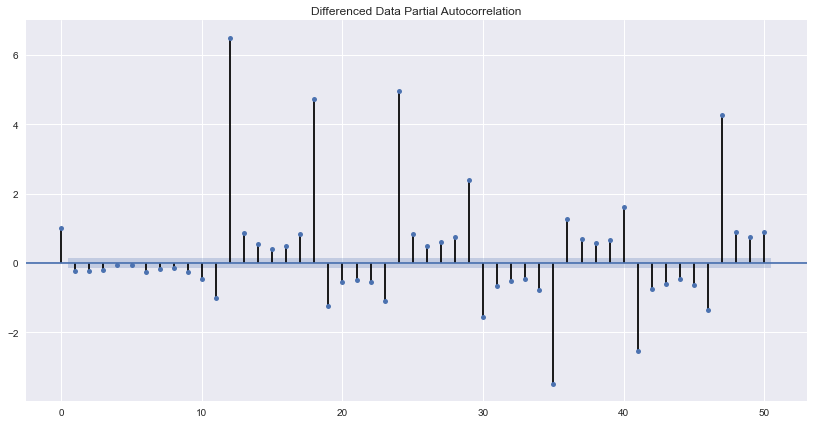

In [574]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data. 

### Rose

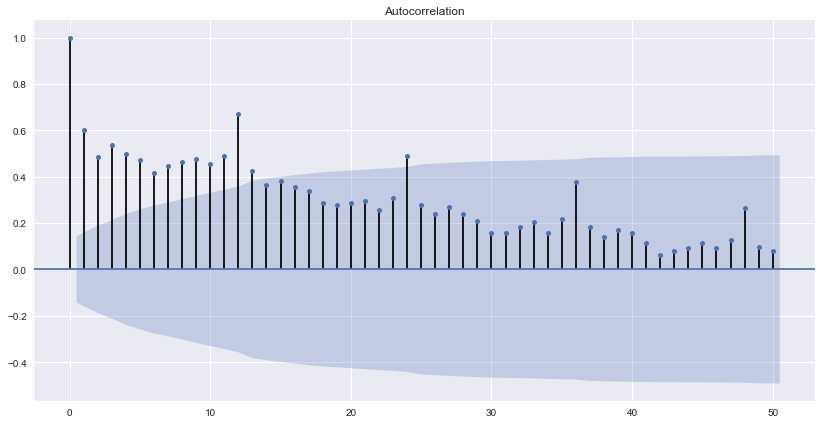

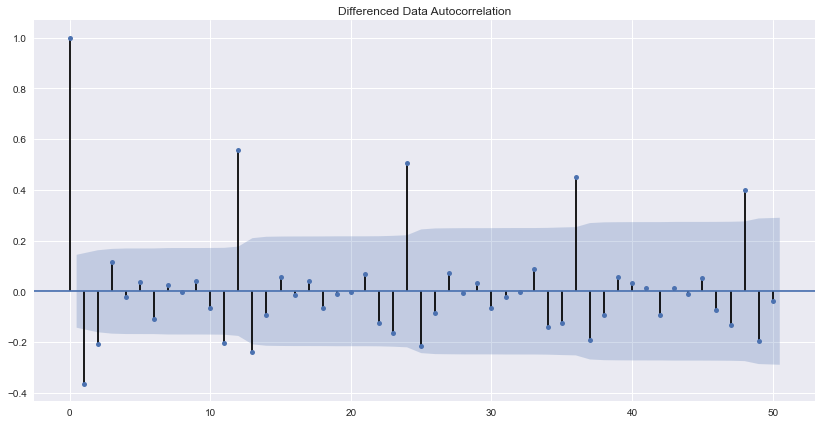

In [575]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

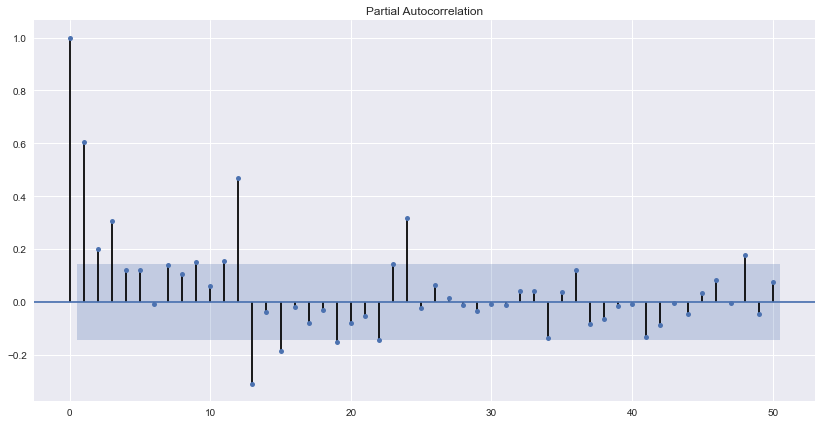

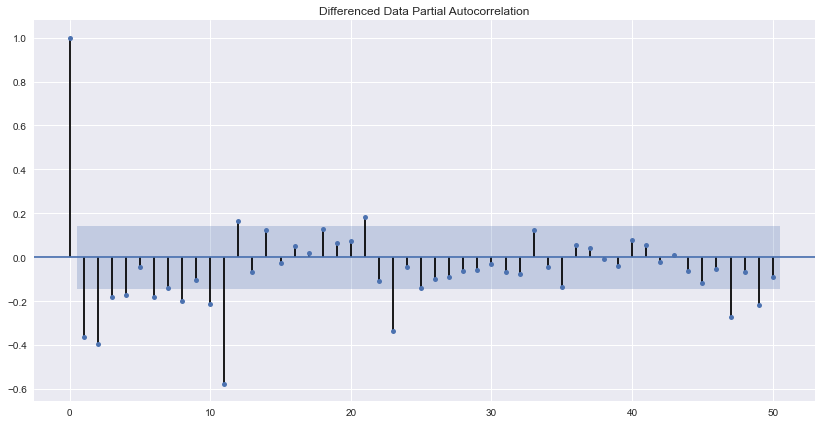

In [576]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Model 8: SARIMA - SPARKLING

In [577]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### AUTO SARIMA on original data

In [578]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
#p = q = range(0,1)
#d= range(0,1)
#D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [579]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [580]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678665
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574252113
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3395.585855651415
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908192392
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621307425
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:5858.1932688069055
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.500098186666
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553686907
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3027.1606381881866
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.2398197439918
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094415
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.607038027663
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:4143.841833179977
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828523
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.66392342300

SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:1574.372406725528
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1571.8577388008093
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1401.910419970783
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:5916.520904764281
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.985406982294
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.9924735500217
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.8183454937564
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:18.0
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766082513
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.148334204719
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.7597823054928
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3458.288230752824
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930710852897
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.9467324125756
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645114
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:2538.2002032922574
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644411398
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.1200892465158
SARIMA(2, 1,

In [581]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal         AIC
107  (1, 1, 2)  (2, 1, 3, 12)   18.000000
155  (2, 1, 1)  (2, 1, 3, 12)   18.000000
27   (0, 1, 1)  (2, 1, 3, 12)   88.058295
179  (2, 1, 3)  (0, 1, 3, 12)  173.539206
183  (2, 1, 3)  (1, 1, 3, 12)  236.059945

In [582]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Tue, 12 Oct 2021   AIC                           1213.283
Time:                                     21:13:13   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6138      0.176     -9.175      0.000      -1.958      -1.269
ar.L2         -0.6116      

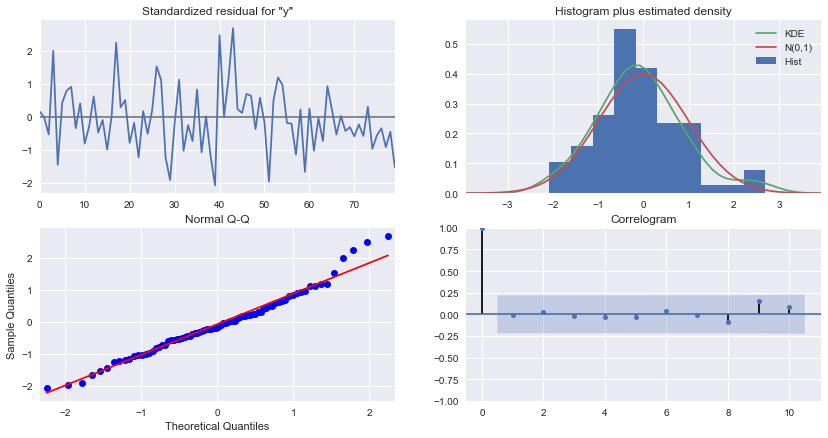

In [583]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [584]:
SARIMA_test.head()

Sparkling  Rose
YearMonth                  
1991-01-31       1902  54.0
1991-02-28       2049  55.0
1991-03-31       1874  66.0
1991-04-30       1279  65.0
1991-05-31       1432  60.0

In [585]:
#pred_dynamic = results_auto_SARIMA_spark.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [586]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)


In [587]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1430.791480  431.172743     585.708433    2275.874526
1  1540.574479  458.383035     642.160239    2438.988718
2  1707.861319  460.154837     805.974411    2609.748227
3  1859.150183  466.712246     944.410989    2773.889377
4  1501.984520  467.013568     586.654746    2417.314293

In [588]:
# Extract the predicted and true values of our time series
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted
YearMonth                                    
1991-01-31       1902  54.0       1430.791480
1991-02-28       2049  55.0       1540.574479
1991-03-31       1874  66.0       1707.861319
1991-04-30       1279  65.0       1859.150183
1991-05-31       1432  60.0       1501.984520

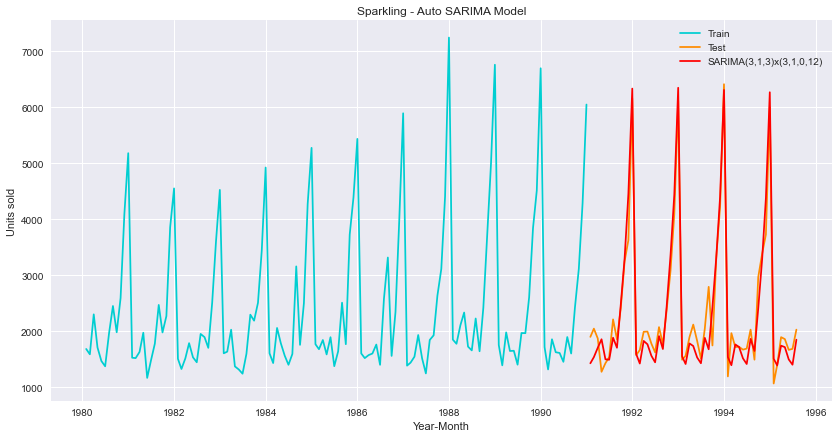

In [589]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [590]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 331.586 and MAPE is 10.33


In [591]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33

### AUTO SARIMA on Log(Sparkling)

In [592]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

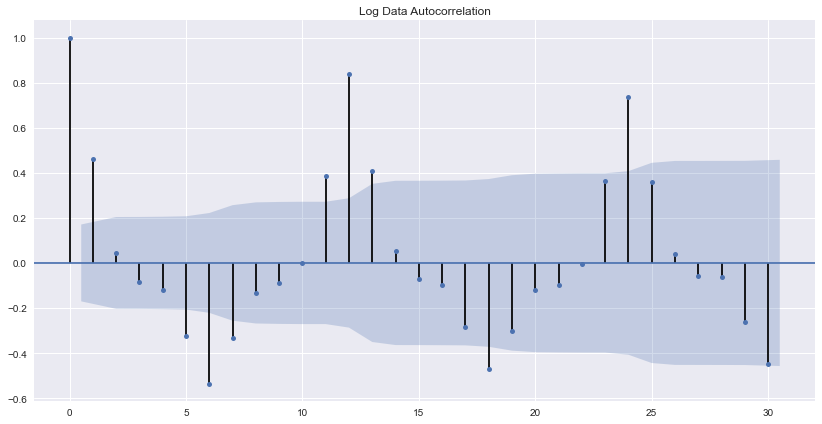

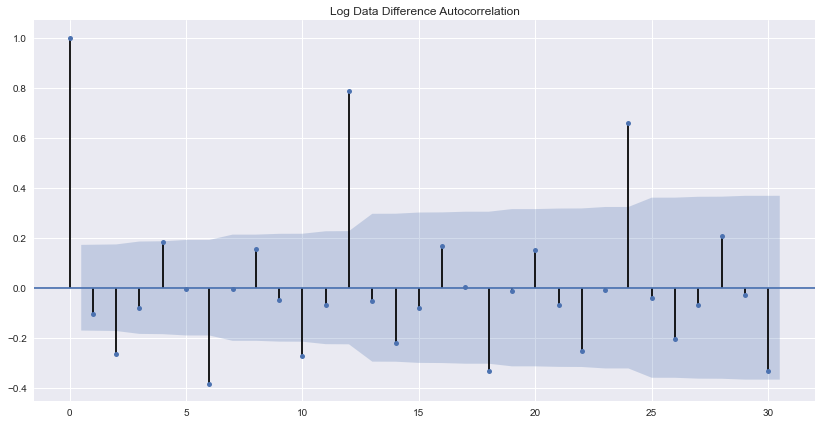

In [593]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

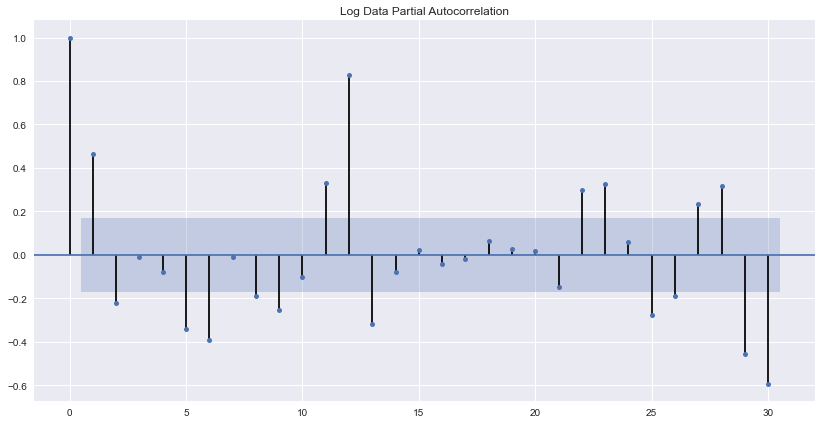

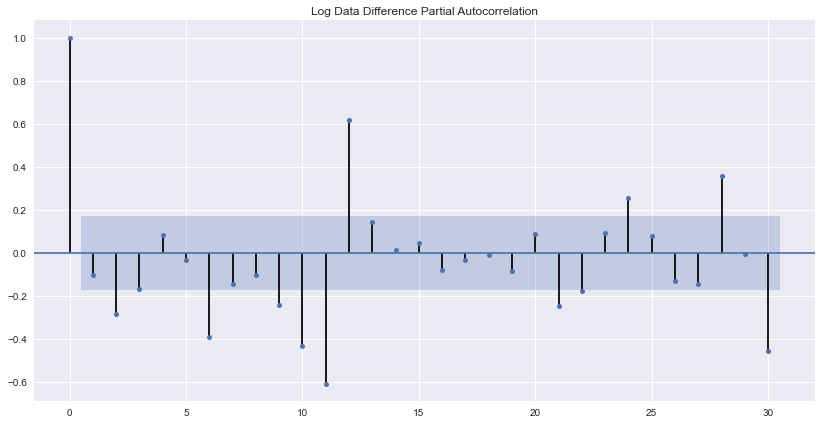

In [594]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [595]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [596]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [597]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.22316326227245
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.81829469978429
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.07304219597538
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.91064502657775
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.210408069403
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378237935855
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527734168542
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.1904718295891
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.4132854244058
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913589961724
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.67576097043738
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.2889255288647
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722200653
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.30580283357406
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.5990030923874
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.22797543082524
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.23566708682182
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-

SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-96.13368007525384
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.71504670048859
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.94168136945538
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.60373962173014
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.59665383282623
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.89805700701663
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.3087475523428
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.8169142546075
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.40945219373157
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.33412014820843
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.34985356903923
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22802938497853
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.9603266840349
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.65360077454204
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.10206186008378
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.45849673426605
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.49383077351325
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AI

In [598]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517335
43   (0, 1, 2)  (1, 0, 1, 12) -281.567996
97   (1, 1, 2)  (1, 0, 1, 12) -279.611723
133  (2, 1, 1)  (1, 0, 1, 12) -278.288227

In [599]:
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Tue, 12 Oct 2021   AIC                           -284.472
Time:                                    21:15:09   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.861      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

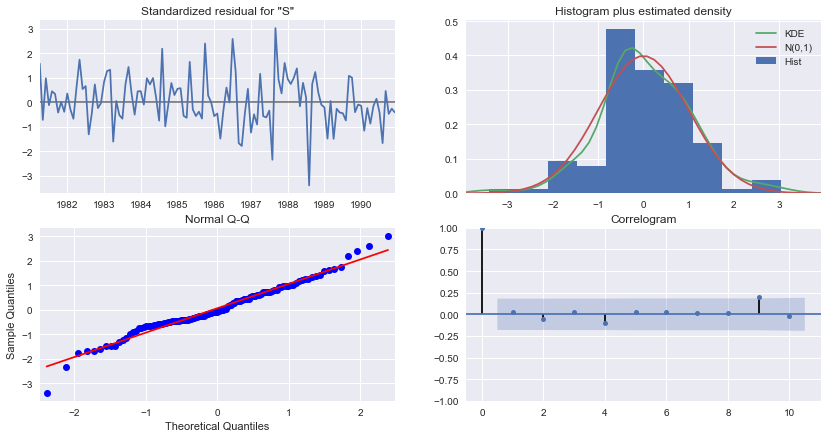

In [600]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model

In [601]:
SARIMA_test.head()

Sparkling  Rose  spark_forecasted
YearMonth                                    
1991-01-31       1902  54.0       1430.791480
1991-02-28       2049  55.0       1540.574479
1991-03-31       1874  66.0       1707.861319
1991-04-30       1279  65.0       1859.150183
1991-05-31       1432  60.0       1501.984520

In [602]:
#pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(start=pd.to_datetime('1991-01-31'), dynamic=True, full_results=True)
pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(dynamic=True, full_results=True)

In [603]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.1)

In [604]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212033  0.067109       3.080501       3.343564
1991-02-28  3.141303  0.067466       3.009073       3.273534
1991-03-31  3.256285  0.067822       3.123357       3.389213
1991-04-30  3.226729  0.068176       3.093107       3.360351
1991-05-31  3.195788  0.068528       3.061476       3.330100

In [605]:
# Extract the predicted and true values of our time series
spark_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['spark_log_forecasted'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted
YearMonth                                                          
1991-01-31       1902  54.0       1430.791480           1629.418186
1991-02-28       2049  55.0       1540.574479           1384.532399
1991-03-31       1874  66.0       1707.861319           1804.202164
1991-04-30       1279  65.0       1859.150183           1685.500780
1991-05-31       1432  60.0       1501.984520           1569.595887

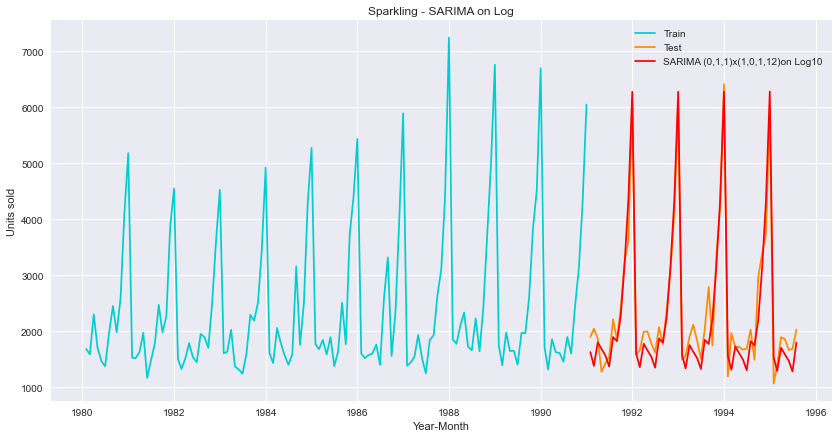

In [606]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best')

In [607]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_log_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_log_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 336.796 and MAPE is 11.18


In [608]:
resultsDf_8_spark2 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(0,1,1)x(1,0,1,12)-Log10'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.795755      11.18

## Manual SARIMA

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

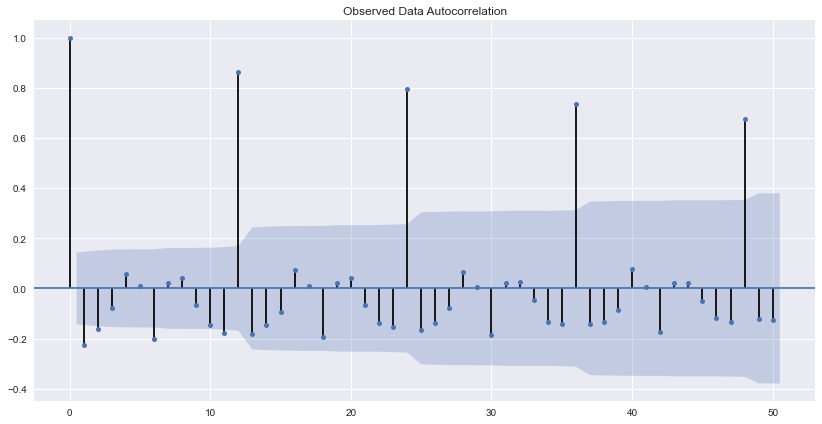

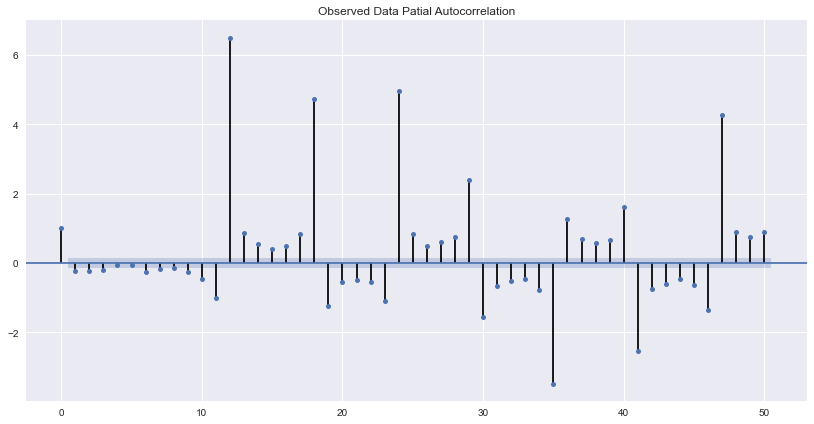

In [609]:

plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

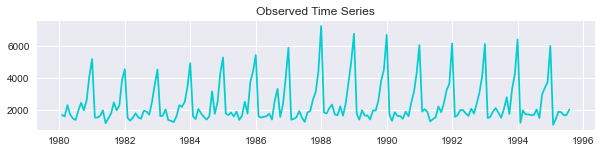

In [610]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

We see that there is marginal trend and but have significant seasonality. So, now we take a seasonal differencing and check the series.

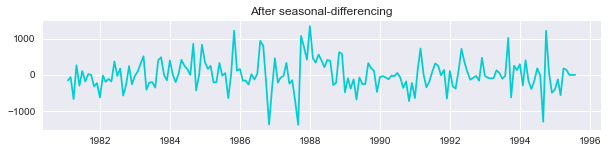

In [611]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

The marginal trend in the data is still seen

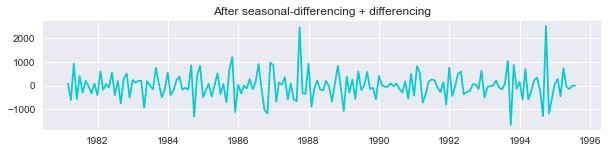

In [612]:
plt.figure(figsize=(10,2))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

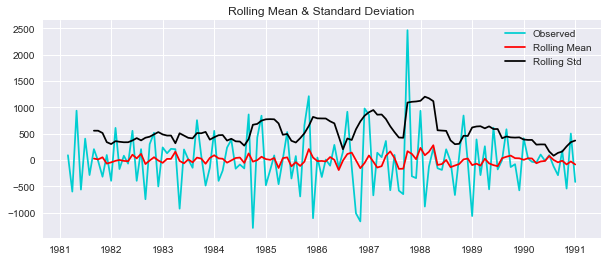

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [613]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

Checking the ACF and the PACF plots for the new modified Time Series.

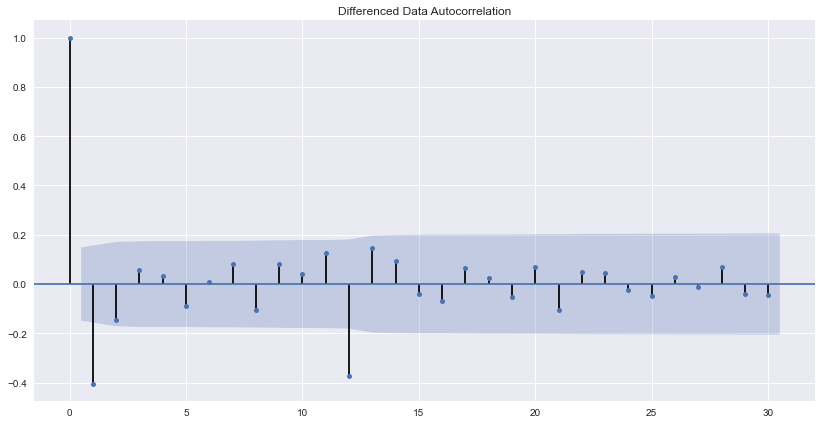

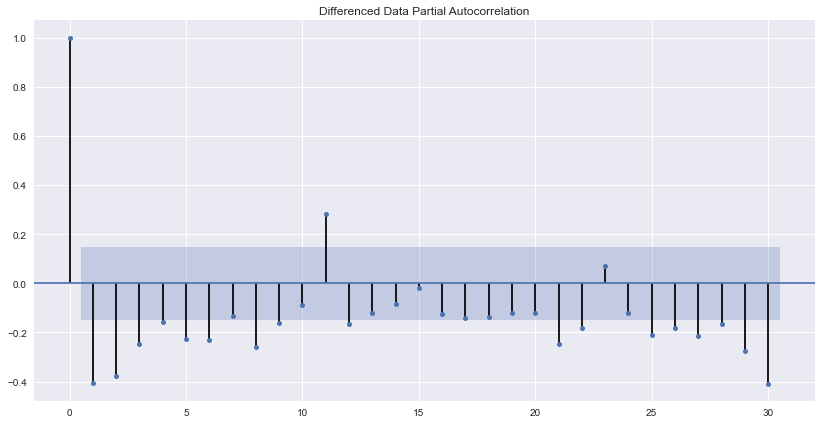

In [614]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [615]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),#(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),#(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Tue, 12 Oct 2021   AIC                           1403.394
Time:                                         21:15:14   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

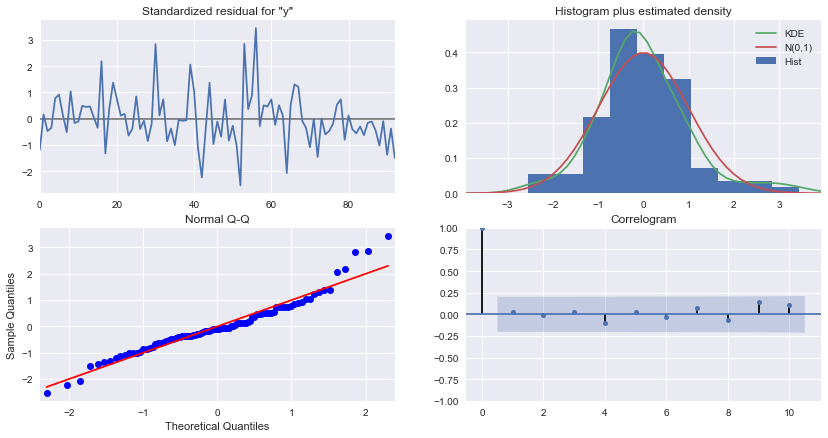

In [616]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

In [617]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [618]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [619]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.910007  416.594424     763.399941    2396.420074
1  1419.154375  429.113818     578.106746    2260.202003
2  1868.144076  429.104459    1027.114791    2709.173361
3  1731.472129  430.973118     886.780339    2576.163919
4  1659.822533  431.906099     813.302135    2506.342931

In [620]:
# Extract the predicted and true values of our time series
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.791480           1629.418186   
1991-02-28       2049  55.0       1540.574479           1384.532399   
1991-03-31       1874  66.0       1707.861319           1804.202164   
1991-04-30       1279  65.0       1859.150183           1685.500780   
1991-05-31       1432  60.0       1501.984520           1569.595887   

            spark_manual_forecasted  
YearMonth                            
1991-01-31              1579.910007  
1991-02-28              1419.154375  
1991-03-31              1868.144076  
1991-04-30              1731.472129  
1991-05-31              1659.822533

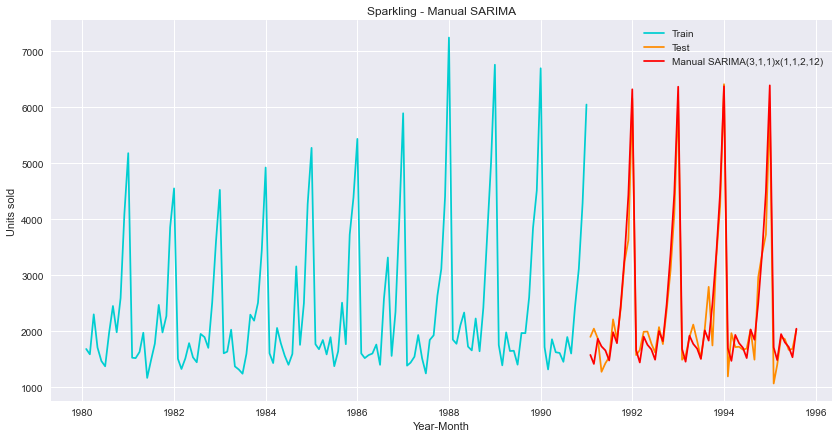

In [621]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [622]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.107 and MAPE is 9.48


In [623]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.795755      11.18
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106737       9.48

## Model 8 - SARIMA on ROSE

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### Original ROSE data

In [624]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [625]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [626]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301621102
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776037
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3365.688534295341
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601602
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.733218265448
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3315.148147669504
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374416
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.339072914358
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244222538
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:2312.5874023880265
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.3958122739762
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165246489946
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713372096
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3477.259152077564
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.766313356333
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717374
SARIMA(0, 

SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3614.5968020273062
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.8940753934108
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.8928054278833
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.8335673143462
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:18.0
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:694.938675167876
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:687.9965319955045
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:688.9099136509084
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:20.0
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823964822049
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.7004130514974
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1410381852554
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:16.0
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705668461805
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932523909741
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8282080560315
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:3273.1522603923313
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799442942127
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:783.703652

In [627]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal   AIC
147  (2, 1, 1)  (0, 1, 3, 12)  14.0
99   (1, 1, 2)  (0, 1, 3, 12)  14.0
163  (2, 1, 2)  (0, 1, 3, 12)  16.0
43   (0, 1, 2)  (2, 1, 3, 12)  16.0
91   (1, 1, 1)  (2, 1, 3, 12)  16.0

In [628]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Tue, 12 Oct 2021   AIC                            681.363
Time:                                    21:24:31   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0171      0.151      0.113      0.910      -0.279       0.313
ar.L2         -0.0427      0.141   

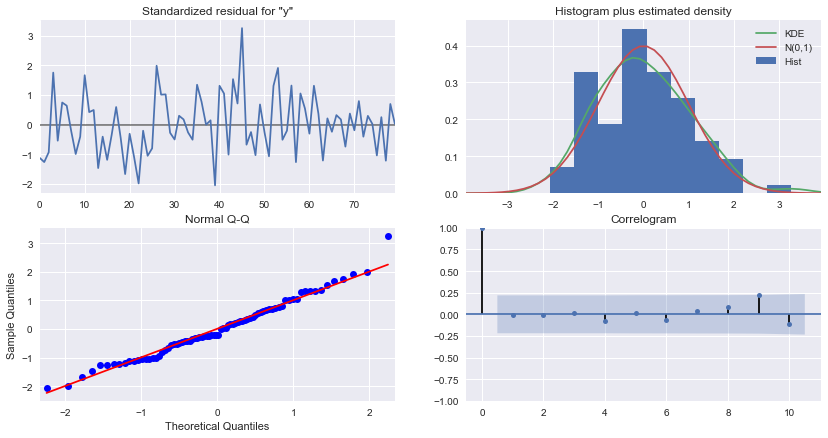

In [629]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [630]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [631]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [632]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.229137  14.459295      16.889440      73.568833
1  63.052964  14.504070      34.625510      91.480418
2  68.118091  14.454103      39.788570      96.447613
3  61.824708  14.450336      33.502570      90.146847
4  68.436645  14.470908      40.074188      96.799103

In [633]:
# Extract the predicted and true values of our time series
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.791480           1629.418186   
1991-02-28       2049  55.0       1540.574479           1384.532399   
1991-03-31       1874  66.0       1707.861319           1804.202164   
1991-04-30       1279  65.0       1859.150183           1685.500780   
1991-05-31       1432  60.0       1501.984520           1569.595887   

            spark_manual_forecasted  rose_auto_forecasted  
YearMonth                                                  
1991-01-31              1579.910007             45.229137  
1991-02-28              1419.154375             63.052964  
1991-03-31              1868.144076             68.118091  
1991-04-30              1731.472129             61.824708  
1991-05-31              1659.822533             68.436645

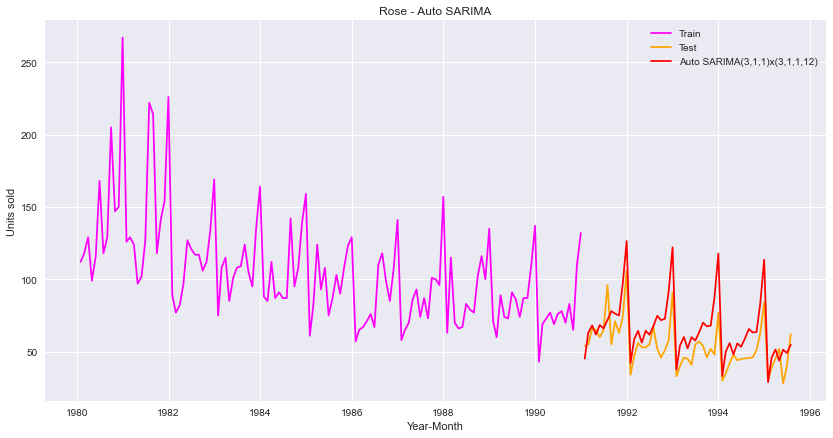

In [634]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_auto_forecasted'], color='red', label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best')

In [635]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the SRose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.823 and MAPE is 25.48


In [636]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48

## AUTO SARIMA ON LOG(ROSE)

In [637]:
rose_log_train = np.log10(SARIMA_train['Rose'])

In [638]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [639]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [640]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:555.7706618310567
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:380.7976958405474
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:253.02210408794198
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-203.8690585880142
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-207.30753067775314
SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:-200.3749101416422
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-214.78669155250248
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-256.17028103208605
SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:-233.1445326662878
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-209.00182479539552
SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-206.62380291142412
SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:-198.50588487035787
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:-233.48304581147525
SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:-233.82264953371393
SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:-238.64163634257275
SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:-201.4914449430335
SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:-203.4992557680455
SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:-199

SARIMA(1, 0, 2)x(0, 0, 1, 12)7 - AIC:-201.09045678910968
SARIMA(1, 0, 2)x(0, 0, 2, 12)7 - AIC:-194.65417639471434
SARIMA(1, 0, 2)x(0, 1, 0, 12)7 - AIC:-203.80790693631042
SARIMA(1, 0, 2)x(0, 1, 1, 12)7 - AIC:-247.73418133443522
SARIMA(1, 0, 2)x(0, 1, 2, 12)7 - AIC:-217.33047686196062
SARIMA(1, 0, 2)x(1, 0, 0, 12)7 - AIC:-211.20780826655508
SARIMA(1, 0, 2)x(1, 0, 1, 12)7 - AIC:-248.70821261737228
SARIMA(1, 0, 2)x(1, 0, 2, 12)7 - AIC:-229.79518339331003
SARIMA(1, 0, 2)x(1, 1, 0, 12)7 - AIC:-233.73510305854367
SARIMA(1, 0, 2)x(1, 1, 1, 12)7 - AIC:-231.31561357941374
SARIMA(1, 0, 2)x(1, 1, 2, 12)7 - AIC:-216.3197991730387
SARIMA(1, 0, 2)x(2, 0, 0, 12)7 - AIC:-236.52568341967356
SARIMA(1, 0, 2)x(2, 0, 1, 12)7 - AIC:-238.65120644416936
SARIMA(1, 0, 2)x(2, 0, 2, 12)7 - AIC:-238.0807492961964
SARIMA(1, 0, 2)x(2, 1, 0, 12)7 - AIC:-211.6171382038549
SARIMA(1, 0, 2)x(2, 1, 1, 12)7 - AIC:-212.1394950278625
SARIMA(1, 0, 2)x(2, 1, 2, 12)7 - AIC:-212.99494517128647
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AI

SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.386113770211
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973804866323
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373736655048
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.24003063489192
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.0500226556257
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.47194033309353
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.25689940174146
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.96974007797908
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.9167454593108
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.0616557721561
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52221334187303
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.66212677518612
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.3304810749709
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.10470079374795
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.45566627316566
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-209.69583802893055
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.28757666386826
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:

In [641]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
115  (1, 0, 0)  (1, 0, 1, 12) -257.620750
7    (0, 0, 0)  (1, 0, 1, 12) -256.170281
133  (1, 0, 1)  (1, 0, 1, 12) -255.482061
25   (0, 0, 1)  (1, 0, 1, 12) -254.978844
223  (2, 0, 0)  (1, 0, 1, 12) -253.620649

In [642]:
auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 132.810
Date:                              Tue, 12 Oct 2021   AIC                           -257.621
Time:                                      21:29:07   BIC                           -246.504
Sample:                                  01-31-1980   HQIC                          -253.107
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1689      0.078      2.179      0.029       0.017       0.321
ar.S.L12       0.98

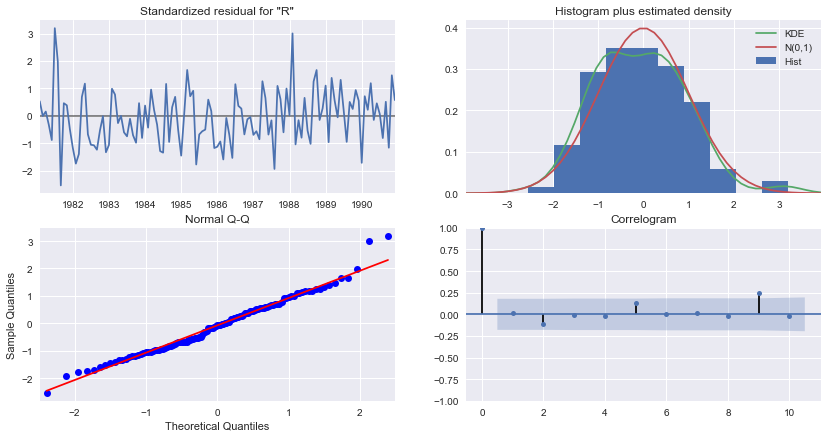

In [643]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [644]:
pred_dynamic = results_auto_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [645]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [646]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.727939  0.073895       1.583108       1.872769
1991-02-28  1.787594  0.074681       1.641222       1.933966
1991-03-31  1.820439  0.074703       1.674023       1.966855
1991-04-30  1.780352  0.074704       1.633934       1.926769
1991-05-31  1.811708  0.074704       1.665291       1.958125

In [647]:
# Extract the predicted and true values of our time series
rose_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['rose_log_auto_forecasted'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.791480           1629.418186   
1991-02-28       2049  55.0       1540.574479           1384.532399   
1991-03-31       1874  66.0       1707.861319           1804.202164   
1991-04-30       1279  65.0       1859.150183           1685.500780   
1991-05-31       1432  60.0       1501.984520           1569.595887   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.910007             45.229137   
1991-02-28              1419.154375             63.052964   
1991-03-31              1868.144076             68.118091   
1991-04-30              1731.472129             61.824708   
1991-05-31              1659.822533             68.436645   

            rose_log_auto_forecasted  
YearMonth                             
1991-01-31                 53.448902  
1991-02-28                 61.318892  
1991-03-31                 66.136162  
1991-04-30                 60.304767  
1991-05-31                 64.819832

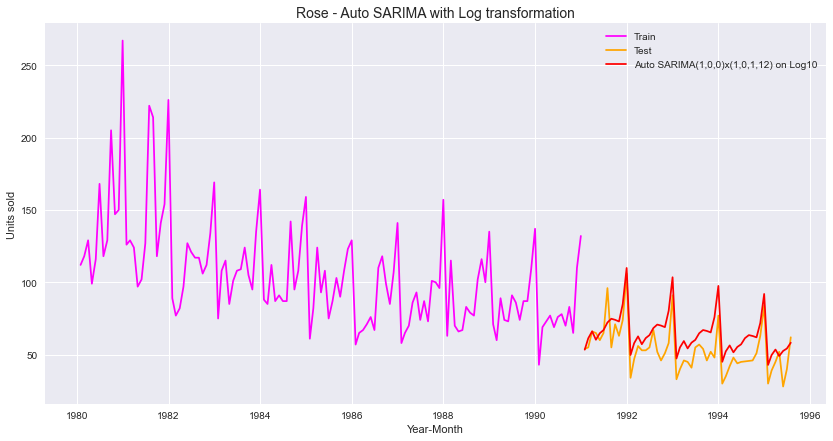

In [648]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_auto_forecasted'], color='red', label='Auto SARIMA(1,0,0)x(1,0,1,12) on Log10')

plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [649]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_auto_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 13.591 and MAPE is 21.92


In [650]:
resultsDf_8_rose2 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(1,0,0)x(1,0,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92

## Manual SARIMA on Rose

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

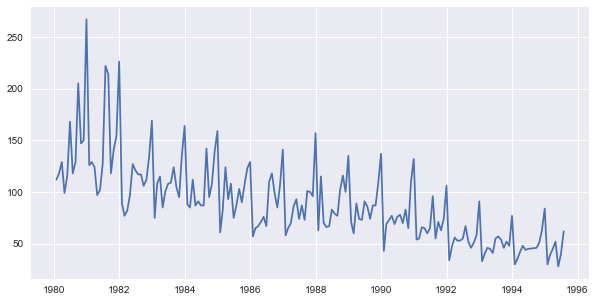

In [651]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'])

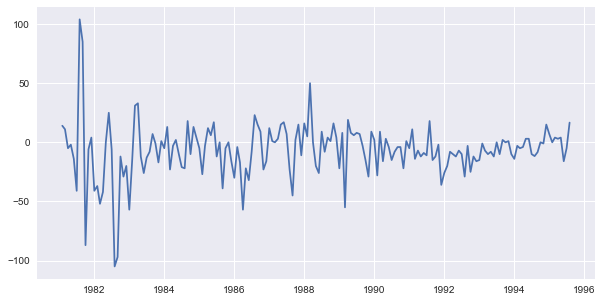

In [652]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna())

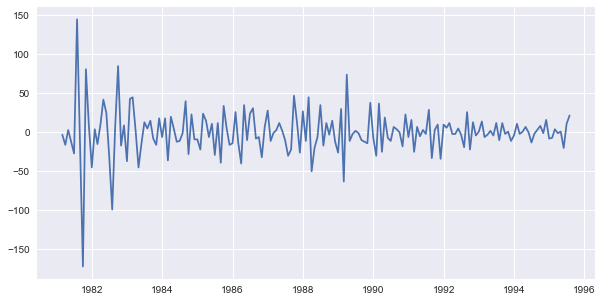

In [653]:
plt.figure(figsize=(10,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())

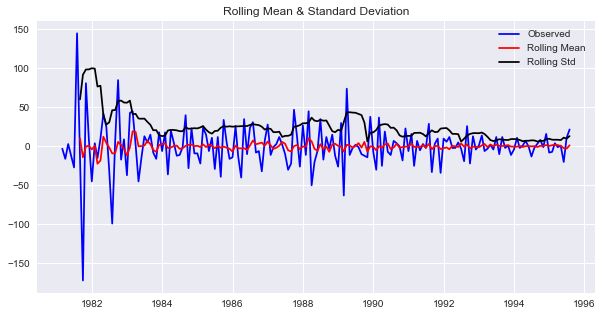

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [654]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(),'blue')

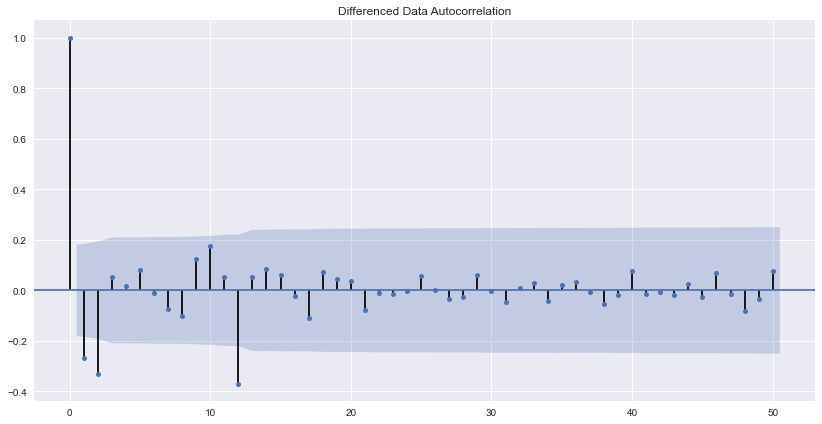

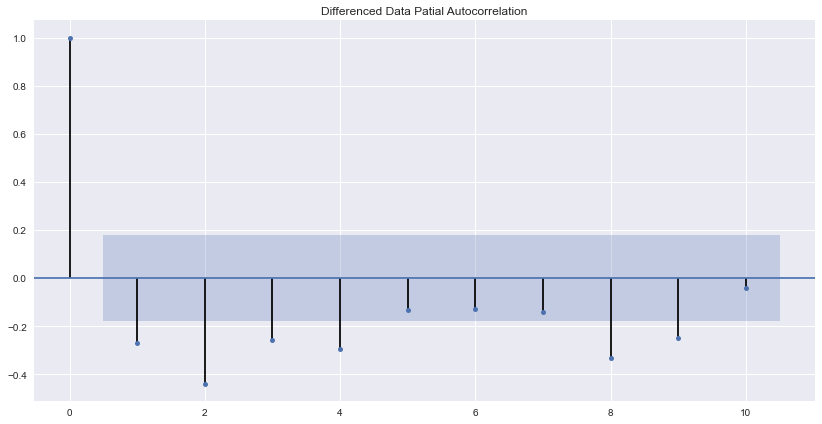

In [655]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [656]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                #seasonal_order=(0, 1, 1, 12),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Tue, 12 Oct 2021   AIC                            786.737
Time:                                    21:29:10   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

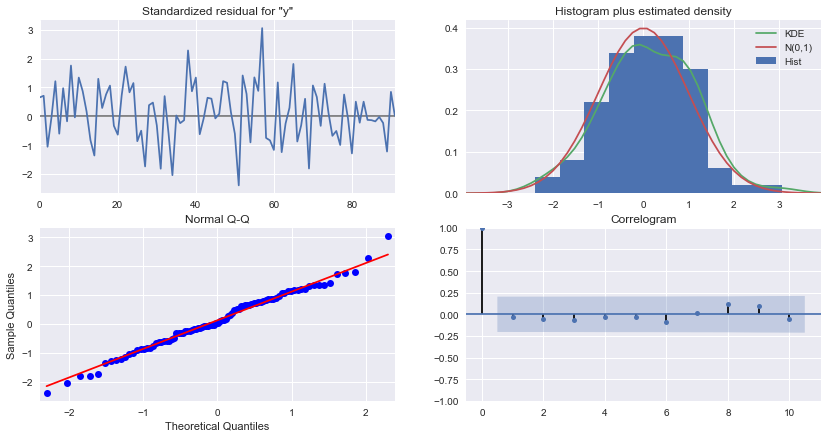

In [657]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [658]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [659]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05)

In [660]:
predicted_manual_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.733041  15.552666      14.250375      75.215707
1  64.208694  16.000768      32.847765      95.569622
2  65.110689  16.074606      33.605040      96.616339
3  68.453063  16.150996      36.797692     100.108433
4  61.423433  16.154556      29.761085      93.085782

In [661]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.791480           1629.418186   
1991-02-28       2049  55.0       1540.574479           1384.532399   
1991-03-31       1874  66.0       1707.861319           1804.202164   
1991-04-30       1279  65.0       1859.150183           1685.500780   
1991-05-31       1432  60.0       1501.984520           1569.595887   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.910007             45.229137   
1991-02-28              1419.154375             63.052964   
1991-03-31              1868.144076             68.118091   
1991-04-30              1731.472129             61.824708   
1991-05-31              1659.822533             68.436645   

            rose_log_auto_forecasted  rose_manual_forecasted  
YearMonth                                                     
1991-01-31                 53.448902               44.733041  
1991-02-28                 61.318892               64.208694  
1991-03-31                 66.136162               65.110689  
1991-04-30                 60.304767               68.453063  
1991-05-31                 64.819832               61.423433

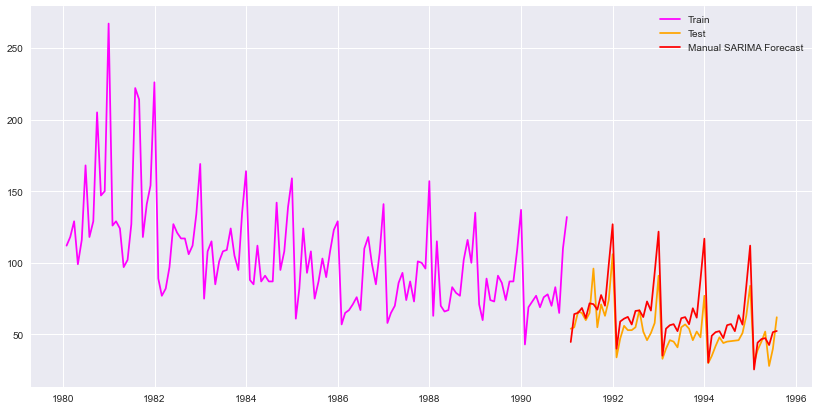

In [662]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_manual_forecasted'], color='red', label='Manual SARIMA Forecast')

plt.legend(loc='best')

In [663]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 15.377 and MAPE is 22.16


In [664]:
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose3])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16

## Manual SARIMA on Log(Rose)

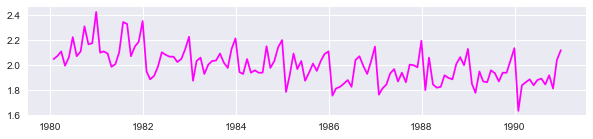

In [665]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train, color='magenta')

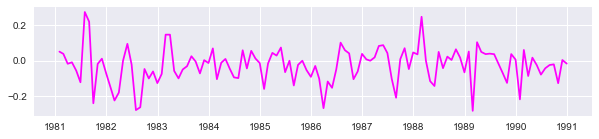

In [666]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train.diff(12).dropna(), color='magenta')#.diff().dropna())

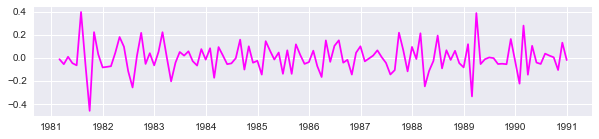

In [667]:
plt.figure(figsize=(10,2))
plt.plot((rose_log_train.diff(12).dropna()).diff().dropna(), color='magenta')#.diff().dropna())

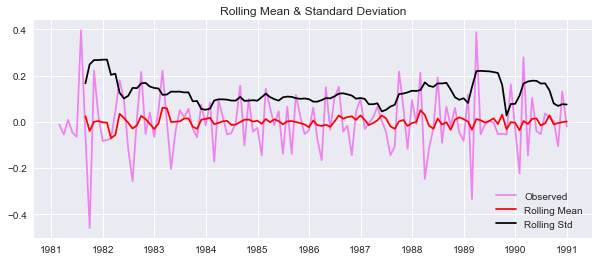

Results of Dickey-Fuller Test:
Test Statistic                  -3.910109
p-value                          0.001962
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [668]:
plt.figure(figsize=(10,4))
test_stationarity((rose_log_train.diff(12).dropna()).diff().dropna(), 'violet')

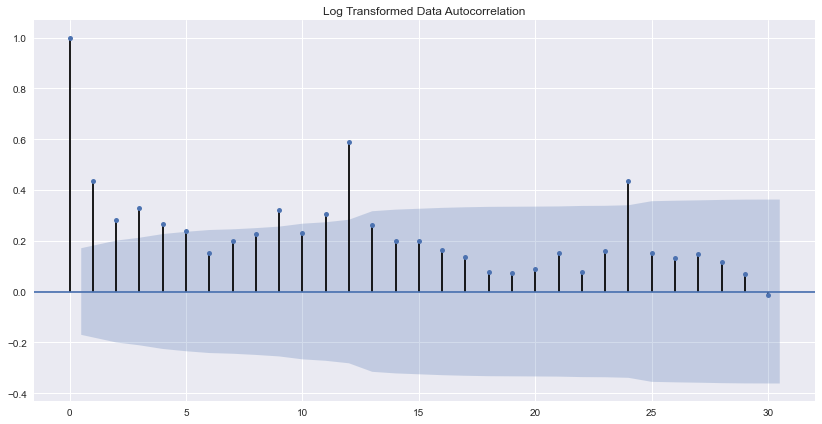

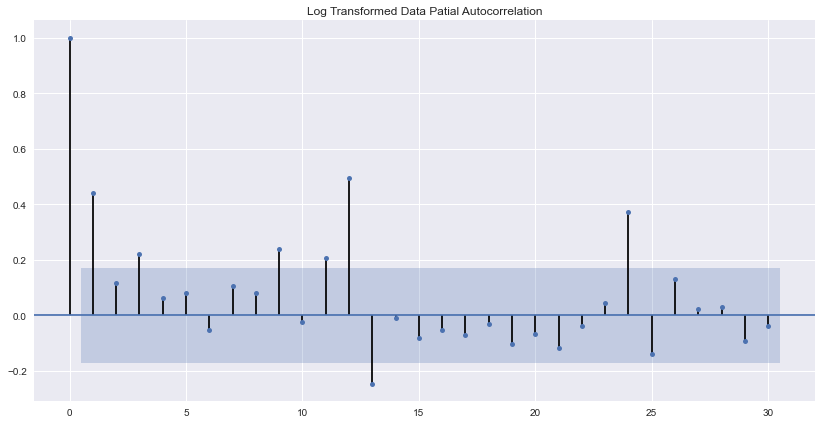

In [669]:
plot_acf(rose_log_train,lags=30,title='Log Transformed Data Autocorrelation')
plot_pacf(rose_log_train,lags=30,title='Log Transformed Data Patial Autocorrelation')
plt.show()

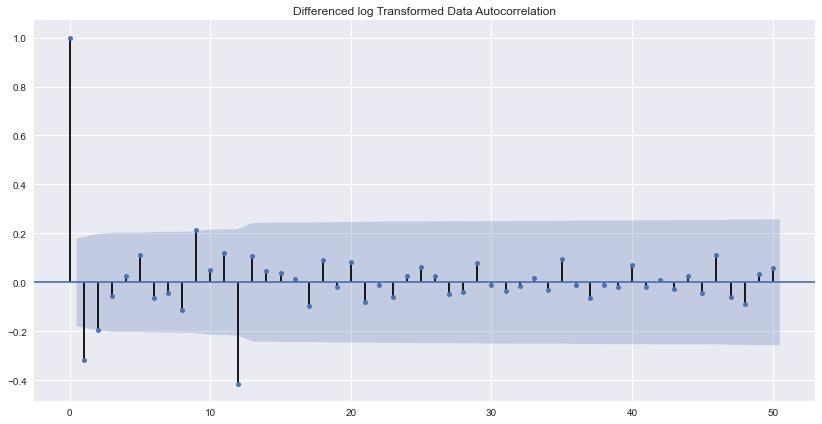

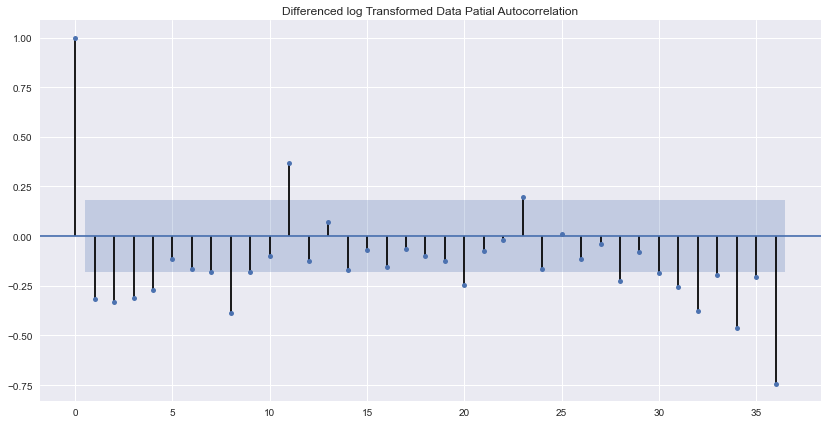

In [670]:
plot_acf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=50,title='Differenced log Transformed Data Autocorrelation')
plot_pacf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=36,title='Differenced log Transformed Data Patial Autocorrelation')
plt.show()

In [671]:
manual_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order= (4, 1, 1),
                                seasonal_order= (0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose_log = manual_SARIMA_rose_log.fit(maxiter=1000)
print(results_manual_SARIMA_rose_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 128.764
Date:                            Tue, 12 Oct 2021   AIC                           -243.528
Time:                                    21:29:14   BIC                           -224.950
Sample:                                01-31-1980   HQIC                          -236.000
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0019      0.118     -0.017      0.987      -0.232       0.229
ar.L2         -0.1547      0.126   

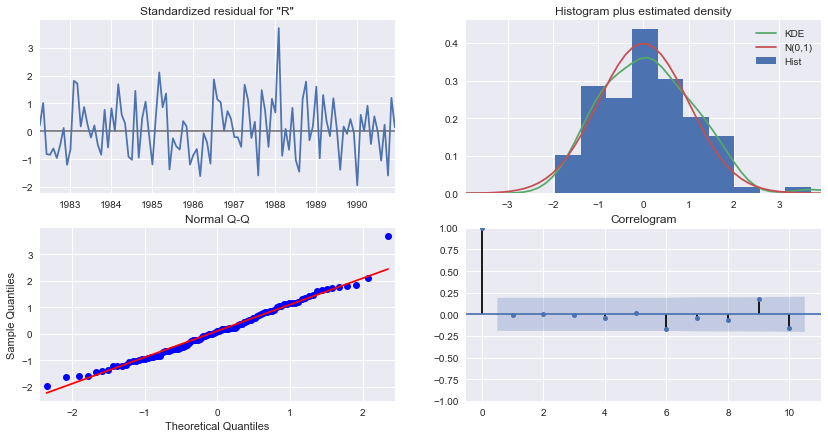

In [672]:
results_manual_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [673]:
pred_dynamic = results_manual_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [674]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose_log = results_manual_SARIMA_rose_log.get_forecast(steps=len(test['Rose']), alpha=0.1)

In [675]:
predicted_manual_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.721121  0.067158       1.589494       1.852748
1991-02-28  1.789069  0.067954       1.655882       1.922256
1991-03-31  1.811243  0.067951       1.678061       1.944425
1991-04-30  1.786829  0.067974       1.653603       1.920055
1991-05-31  1.820831  0.067819       1.687908       1.953753

In [676]:
SARIMA_test['rose_log_manual_forecasted'] = np.power(10,predicted_manual_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.791480           1629.418186   
1991-02-28       2049  55.0       1540.574479           1384.532399   
1991-03-31       1874  66.0       1707.861319           1804.202164   
1991-04-30       1279  65.0       1859.150183           1685.500780   
1991-05-31       1432  60.0       1501.984520           1569.595887   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.910007             45.229137   
1991-02-28              1419.154375             63.052964   
1991-03-31              1868.144076             68.118091   
1991-04-30              1731.472129             61.824708   
1991-05-31              1659.822533             68.436645   

            rose_log_auto_forecasted  rose_manual_forecasted  \
YearMonth                                                      
1991-01-31                 53.448902               44.733041   
1991-02-28                 61.318892               64.208694   
1991-03-31                 66.136162               65.110689   
1991-04-30                 60.304767               68.453063   
1991-05-31                 64.819832               61.423433   

            rose_log_manual_forecasted  
YearMonth                               
1991-01-31                   52.616352  
1991-02-28                   61.527444  
1991-03-31                   64.750476  
1991-04-30                   61.210918  
1991-05-31                   66.195818

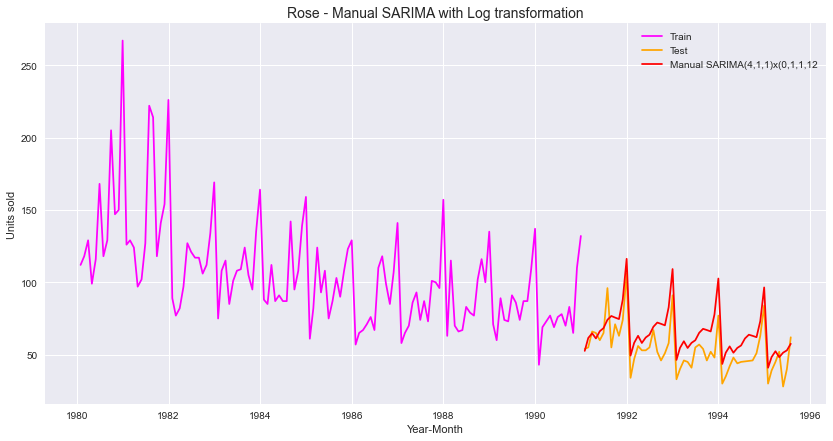

In [677]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_manual_forecasted'], color='red', label='Manual SARIMA(4,1,1)x(0,1,1,12')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [678]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 14.177 and MAPE is 23.10


In [679]:
resultsDf_8_rose4 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,1)x(0,1,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.16, Beta 0.16              15.706968      24.12
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177101      23.10

# Building the most optimum model on the Full Data.

### Sparkling

Sort the results from all the models

In [680]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106737       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.795755      11.18
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.00                         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

In [681]:
spark_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106737       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.795755      11.18
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.00                         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

 Plot all the forecast

Text(0.5, 1.0, 'SPARKLING : Forecasts Vs Test Data')

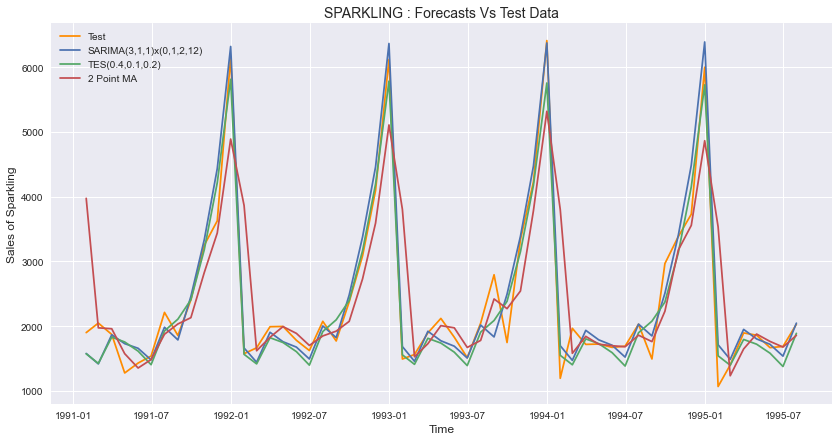

In [682]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'purple')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

#SARIMA
plt.plot(SARIMA_test['spark_manual_forecasted'],  label='SARIMA(3,1,1)x(0,1,2,12)')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
#DES
#plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_spark'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14)


Build model on all of the dataset using best model, which is TES

In [683]:
model_TES_spark = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [684]:
rmse_spark_tes_full = metrics.mean_squared_error(df['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 377.290 and MAPE is 11.36


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast using TES Model')

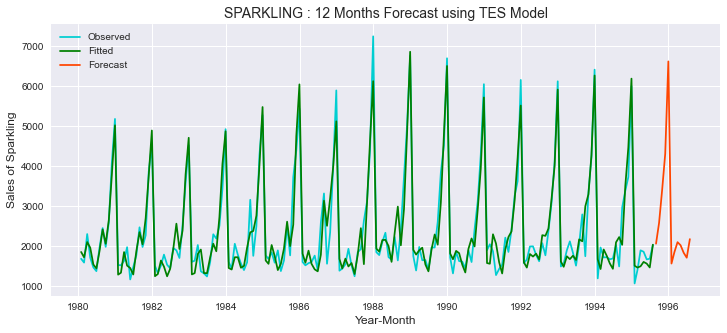

In [685]:
plt.figure(figsize=(12,5))

plt.plot(df['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

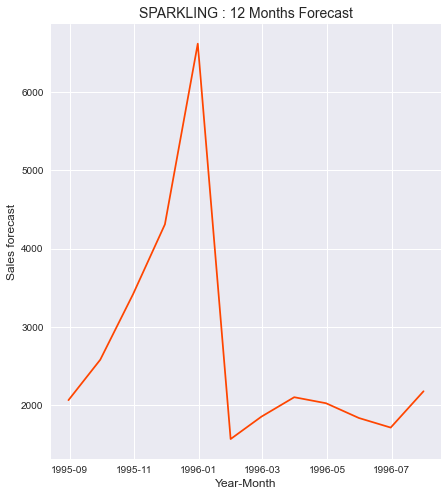

In [686]:
plt.figure(figsize=(7,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

### Attempt SARIMA(3,1,1)x(1,1,2,12) for forecast

In [687]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1078.437
Date:                                 Tue, 12 Oct 2021   AIC                           2176.875
Time:                                         21:29:24   BIC                           2206.711
Sample:                                     01-31-1980   HQIC                          2188.998
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4230      0.086     -4.914      0.000      -0.592      -0

In [688]:
rcParams['figure.figsize'] = 14,7

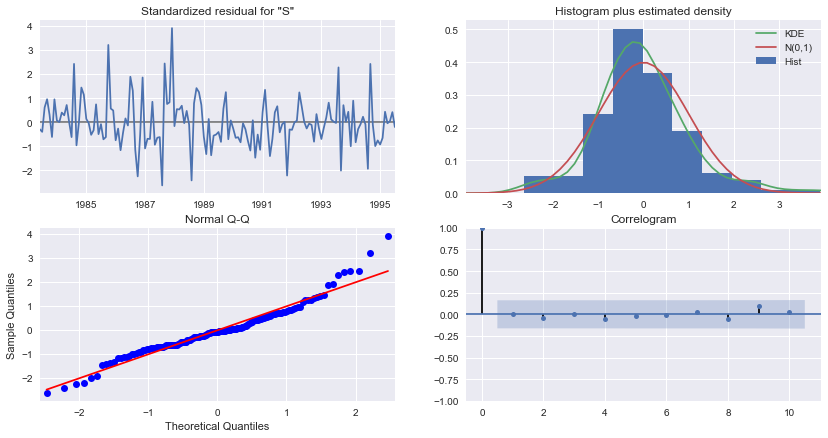

In [689]:
results_full_data_model_spark.plot_diagnostics();

In [690]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [691]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.386261  384.579457    1119.624376    2627.148146
1995-09-30  2444.939414  389.595143    1681.346965    3208.531863
1995-10-31  3312.598542  390.289899    2547.644396    4077.552688
1995-11-30  3994.605734  390.800156    3228.651503    4760.559964
1995-12-31  6084.081330  390.931195    5317.870268    6850.292392

In [692]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.255 and MAPE is 14.86


In [693]:
df.tail()

Sparkling  Rose
YearMonth                  
1995-03-31       1897  45.0
1995-04-30       1862  52.0
1995-05-31       1670  28.0
1995-06-30       1688  40.0
1995-07-31       2031  62.0

In [694]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

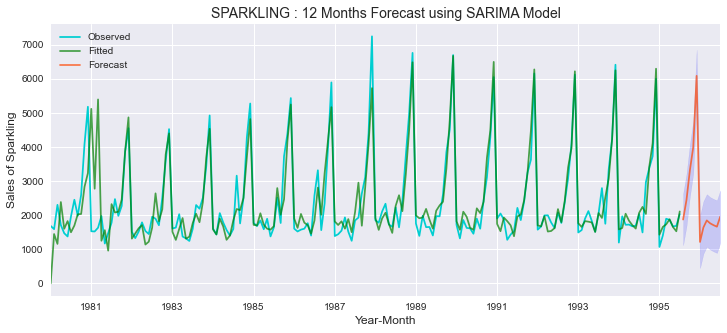

In [695]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

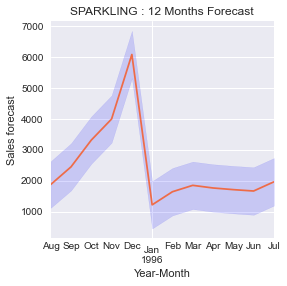

In [696]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)


In [697]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.39
1995-09-30    2444.94
1995-10-31    3312.60
1995-11-30    3994.61
1995-12-31    6084.08
1996-01-31    1215.91
1996-02-29    1640.57
1996-03-31    1847.28
1996-04-30    1761.99
1996-05-31    1708.30
1996-06-30    1664.02
1996-07-31    1961.28

In [698]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.080833
std    1384.638657
min    1215.910000
25%    1697.230000
50%    1860.335000
75%    2661.855000
max    6084.080000

## Rose

In [699]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
2 point TMA                            11.529278      13.54
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177101      23.10
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
DES Alpha 0.16, Beta 0.16              15.706968      24.12
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

In [700]:
rose_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
2 point TMA                            11.529278      13.54
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.493832      13.68
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.590795      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.177101      23.10
DES Alpha 0.16, Beta 0.16              15.706968      24.12
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823277      25.48
TES Alpha 0.11, Beta 0.05, Gamma 0.00  21.019341      35.16
SES Alpha 0.01                         36.796004      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
NaiveModel                             79.718559     145.10

Text(0.5, 1.0, 'ROSE : Forecast Vs Test Data')

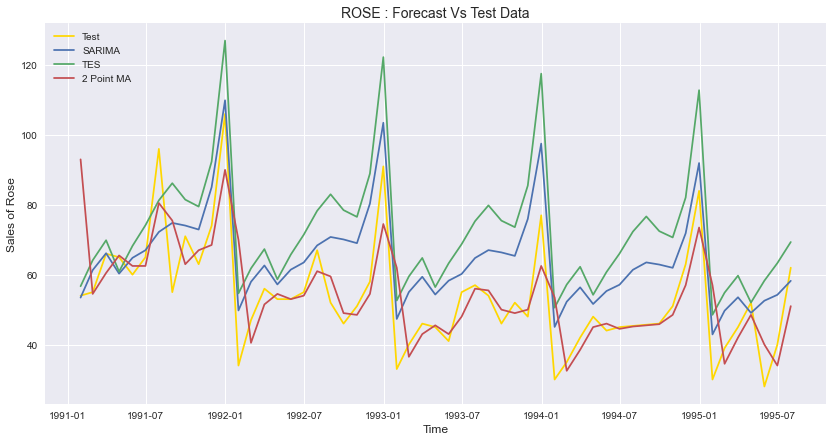

In [701]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#SARIMA
plt.plot(SARIMA_test['rose_log_auto_forecasted'],  label='SARIMA')
#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')
#DES
#plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_rose'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : Forecast Vs Test Data', fontsize=14)


### Build TES Model on Rose full data

In [702]:
model_TES_rose = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

In [703]:
rmse_rose_tes_full = metrics.mean_squared_error(df['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
mape_rose_tes_full = MAPE(df['Rose'],model_TES_rose_fit.fittedvalues)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_tes_full, mape_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 17.404 and MAPE is 13.87


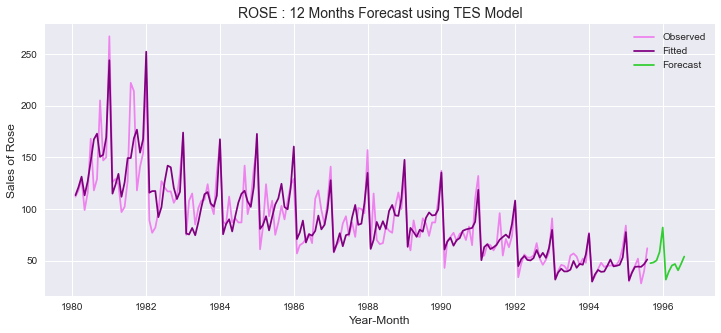

In [704]:
plt.figure(figsize=(12,5))

plt.plot(df['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

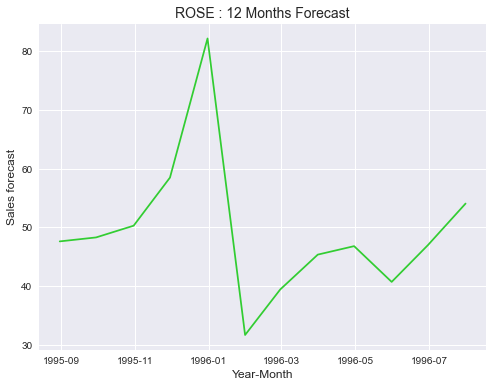

In [705]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14)

### Try SARIMAX

In [706]:
rose_log_trans = np.log10(df['Rose'])

In [707]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],#rose_log_trans.values,
                                order= (4,1,1), #(1,0,0), #(4,1,1)x(0,1,1,12)
                                seasonal_order= (0,1,1,12), #(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Tue, 12 Oct 2021   AIC                           1342.270
Time:                                    21:29:27   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

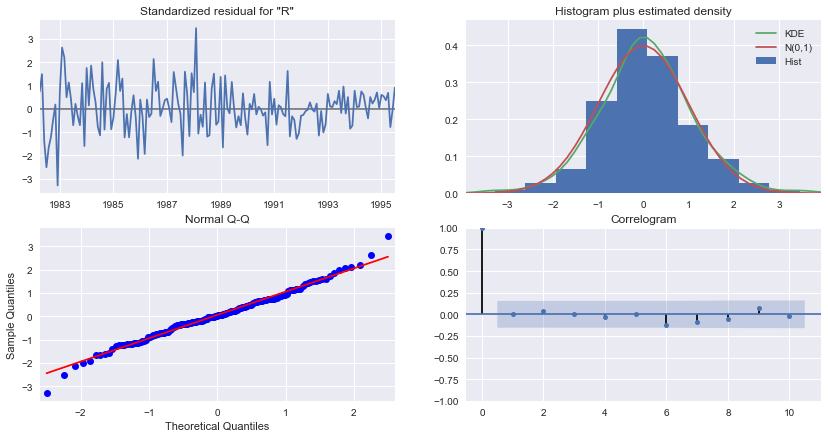

In [708]:
results_full_data_model_rose.plot_diagnostics();

In [709]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  46.540808  15.245486      16.660205      76.421412
1995-09-30  45.514601  15.769108      14.607718      76.421484
1995-10-31  46.226234  15.827871      15.204176      77.248292
1995-11-30  54.319829  15.831176      23.291295      85.348363
1995-12-31  82.214864  15.835193      51.178455     113.251272

In [710]:
#rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues),squared=False)
#mape_rose_sarima_full = MAPE(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues))
rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df['Rose'],results_full_data_model_rose.fittedvalues)

print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


In [711]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [712]:
results_full_data_model_rose.fittedvalues.head()

YearMonth
1980-01-31      0.000000
1980-02-29    115.410430
1980-03-31    114.398802
1980-04-30    123.947737
1980-05-31     92.219740
dtype: float64

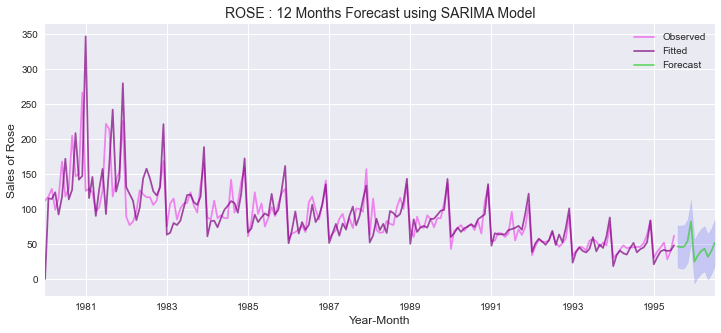

In [713]:
plt.figure(figsize=(12,5))

axis = df['Rose'].plot(label='Observed', color = 'violet')

#np.power(10,results_full_data_model_rose.fittedvalues).plot(label='Fitted', alpha=0.7, color = 'crimson')
#np.power(10,pred_full_manual_SARIMA_date['mean']).plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

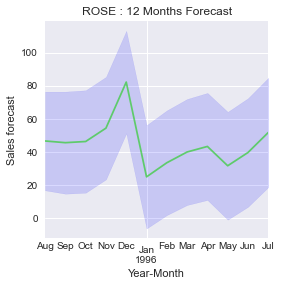

In [714]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)


In [715]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

ROSE
1995-08-31  46.54
1995-09-30  45.51
1995-10-31  46.23
1995-11-30  54.32
1995-12-31  82.21
1996-01-31  24.81
1996-02-29  33.35
1996-03-31  39.87
1996-04-30  43.23
1996-05-31  31.53
1996-06-30  39.56
1996-07-31  51.70

In [716]:
forecast2.describe()

ROSE
count  12.000000
mean   44.905000
std    14.473222
min    24.810000
25%    38.007500
50%    44.370000
75%    47.830000
max    82.210000

In [717]:
forecast2.sum()

ROSE    538.86
dtype: float64

# END